In [1]:
%reload_ext autoreload
%autoreload 2

from ripple_heterogeneity.utils import (
    functions,
    loading,
    batch_analysis,
    add_new_deep_sup,
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nelpy as nel
from matplotlib.ticker import AutoMinorLocator
import os
from scipy import stats
from ripple_heterogeneity.readout import ripple_bias_downstream_v2
from statannotations.Annotator import Annotator
from sklearn.linear_model import LinearRegression

functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv(r"Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv")

region_df = pd.DataFrame()
for basepath in df.basepath:
    brainRegions = loading.load_brain_regions(basepath)
    temp_df = pd.DataFrame()
    temp_df["brainRegions"] = brainRegions.keys()
    temp_df["basepath"] = basepath
    region_df = pd.concat([region_df, temp_df], ignore_index=True)

sessions = region_df[region_df.brainRegions.str.contains("PFC|EC1|EC2|EC3|EC4|EC5|MEC")]
df_sessions = pd.DataFrame()
df_sessions["basepath"] = sessions.basepath.unique()
df_sessions


basepath
0              Z:\Data\AYAold\AYA7\day19
1              Z:\Data\AYAold\AYA7\day20
2              Z:\Data\AYAold\AYA7\day24
3              Z:\Data\AYAold\AYA7\day25
4              Z:\Data\AYAold\AYA7\day27
..                                   ...
113  Z:\Data\Kenji\i01_maze15_MS.001_004
114             Z:\Data\Kenji\nlx_070329
115          Z:\Data\ORproject\OR18\day1
116          Z:\Data\ORproject\OR18\day2
117          Z:\Data\ORproject\OR18\day3

[118 rows x 1 columns]

## Main anaylsis

In [6]:
# basepath = r"Z:\Data\HMC1\day13"
# results = ripple_bias_downstream_v2.run(basepath)

save_path = (
    r"Z:\home\ryanh\projects\ripple_heterogeneity\ripple_layer_bias_all_ripples_v6"
)

batch_analysis.run(
    df_sessions,
    save_path,
    ripple_bias_downstream_v2.run,
    parallel=True,
    overwrite=False,
    verbose=True,
)
# load results
df_layer_bias, rip_resp_df = ripple_bias_downstream_v2.load_results(save_path)


100%|██████████| 118/118 [00:00<00:00, 566.10it/s]


In [7]:
rip_resp_df

n_deep  n_sup  n_pfc  n_mec  n_spikes_deep  n_spikes_sup  \
0            2      0      0      1              3             0   
1            2      0      0      2              4             0   
2            7      1      0      1             24             1   
3            3      0      0      2              5             0   
4            1      0      0      1              2             0   
...        ...    ...    ...    ...            ...           ...   
264451       9      3     13      0             10             5   
264452      13      0      8      0             24             0   
264453       6      1     10      0              7             1   
264454      11      2      3      0             17             6   
264455       5      1      9      0              6             1   

        n_spikes_pfc  n_spikes_mec  pop_rate_deep  pop_rate_sup  pop_rate_pfc  \
0                  0             1      14.792899      0.000000      0.000000   
1                  0             2      20.449898      0.000000      0.000000   
2                  0             1     113.851992      4.743833      0.000000   
3                  0             3      26.766595      0.000000      0.000000   
4                  0             1      10.893246      0.000000      0.000000   
...              ...           ...            ...           ...           ...   
264451            17             0      48.355899     24.177950     82.205029   
264452            13             0     106.571936      0.000000     57.726465   
264453            13             0      41.176471      5.882353     76.470588   
264454             7             0      93.818985     33.112583     38.631347   
264455            12             0      33.259424      5.543237     66.518847   

        pop_rate_mec  avg_pop_rate_deep  avg_pop_rate_sup  avg_pop_rate_pfc  \
0           4.930966           0.870171          0.000000               NaN   
1          10.224949           1.202935          0.000000               NaN   
2           4.743833           6.697176          2.371917               NaN   
3          16.059957           1.574506          0.000000               NaN   
4           5.446623           0.640779          0.000000               NaN   
...              ...                ...               ...               ...   
264451      0.000000           2.014829          6.044487          2.568907   
264452      0.000000           4.440497          0.000000          1.803952   
264453      0.000000           1.715686          1.470588          2.389706   
264454      0.000000           3.909124          8.278146          1.207230   
264455      0.000000           1.385809          1.385809          2.078714   

        avg_pop_rate_mec  deep_sup_spike_ratio  deep_sup_cell_count_ratio  \
0               0.129762                   inf                   1.000000   
1               0.269078                   inf                   1.000000   
2               0.124838             24.000000                   0.750000   
3               0.422630                   inf                   1.000000   
4               0.143332                   inf                   1.000000   
...                  ...                   ...                        ...   
264451               NaN              2.000000                   0.500000   
264452               NaN                   inf                   1.000000   
264453               NaN              7.000000                   0.714286   
264454               NaN              2.833333                   0.692308   
264455               NaN              6.000000                   0.666667   

                           basepath  
0         Z:\Data\AYAold\AYA7\day20  
1         Z:\Data\AYAold\AYA7\day20  
2         Z:\Data\AYAold\AYA7\day20  
3         Z:\Data\AYAold\AYA7\day20  
4         Z:\Data\AYAold\AYA7\day20  
...                             ...  
264451  Z:\Data\ORproject\OR18\day3  
264452  Z:\Data\ORproject\OR18\day3  
26

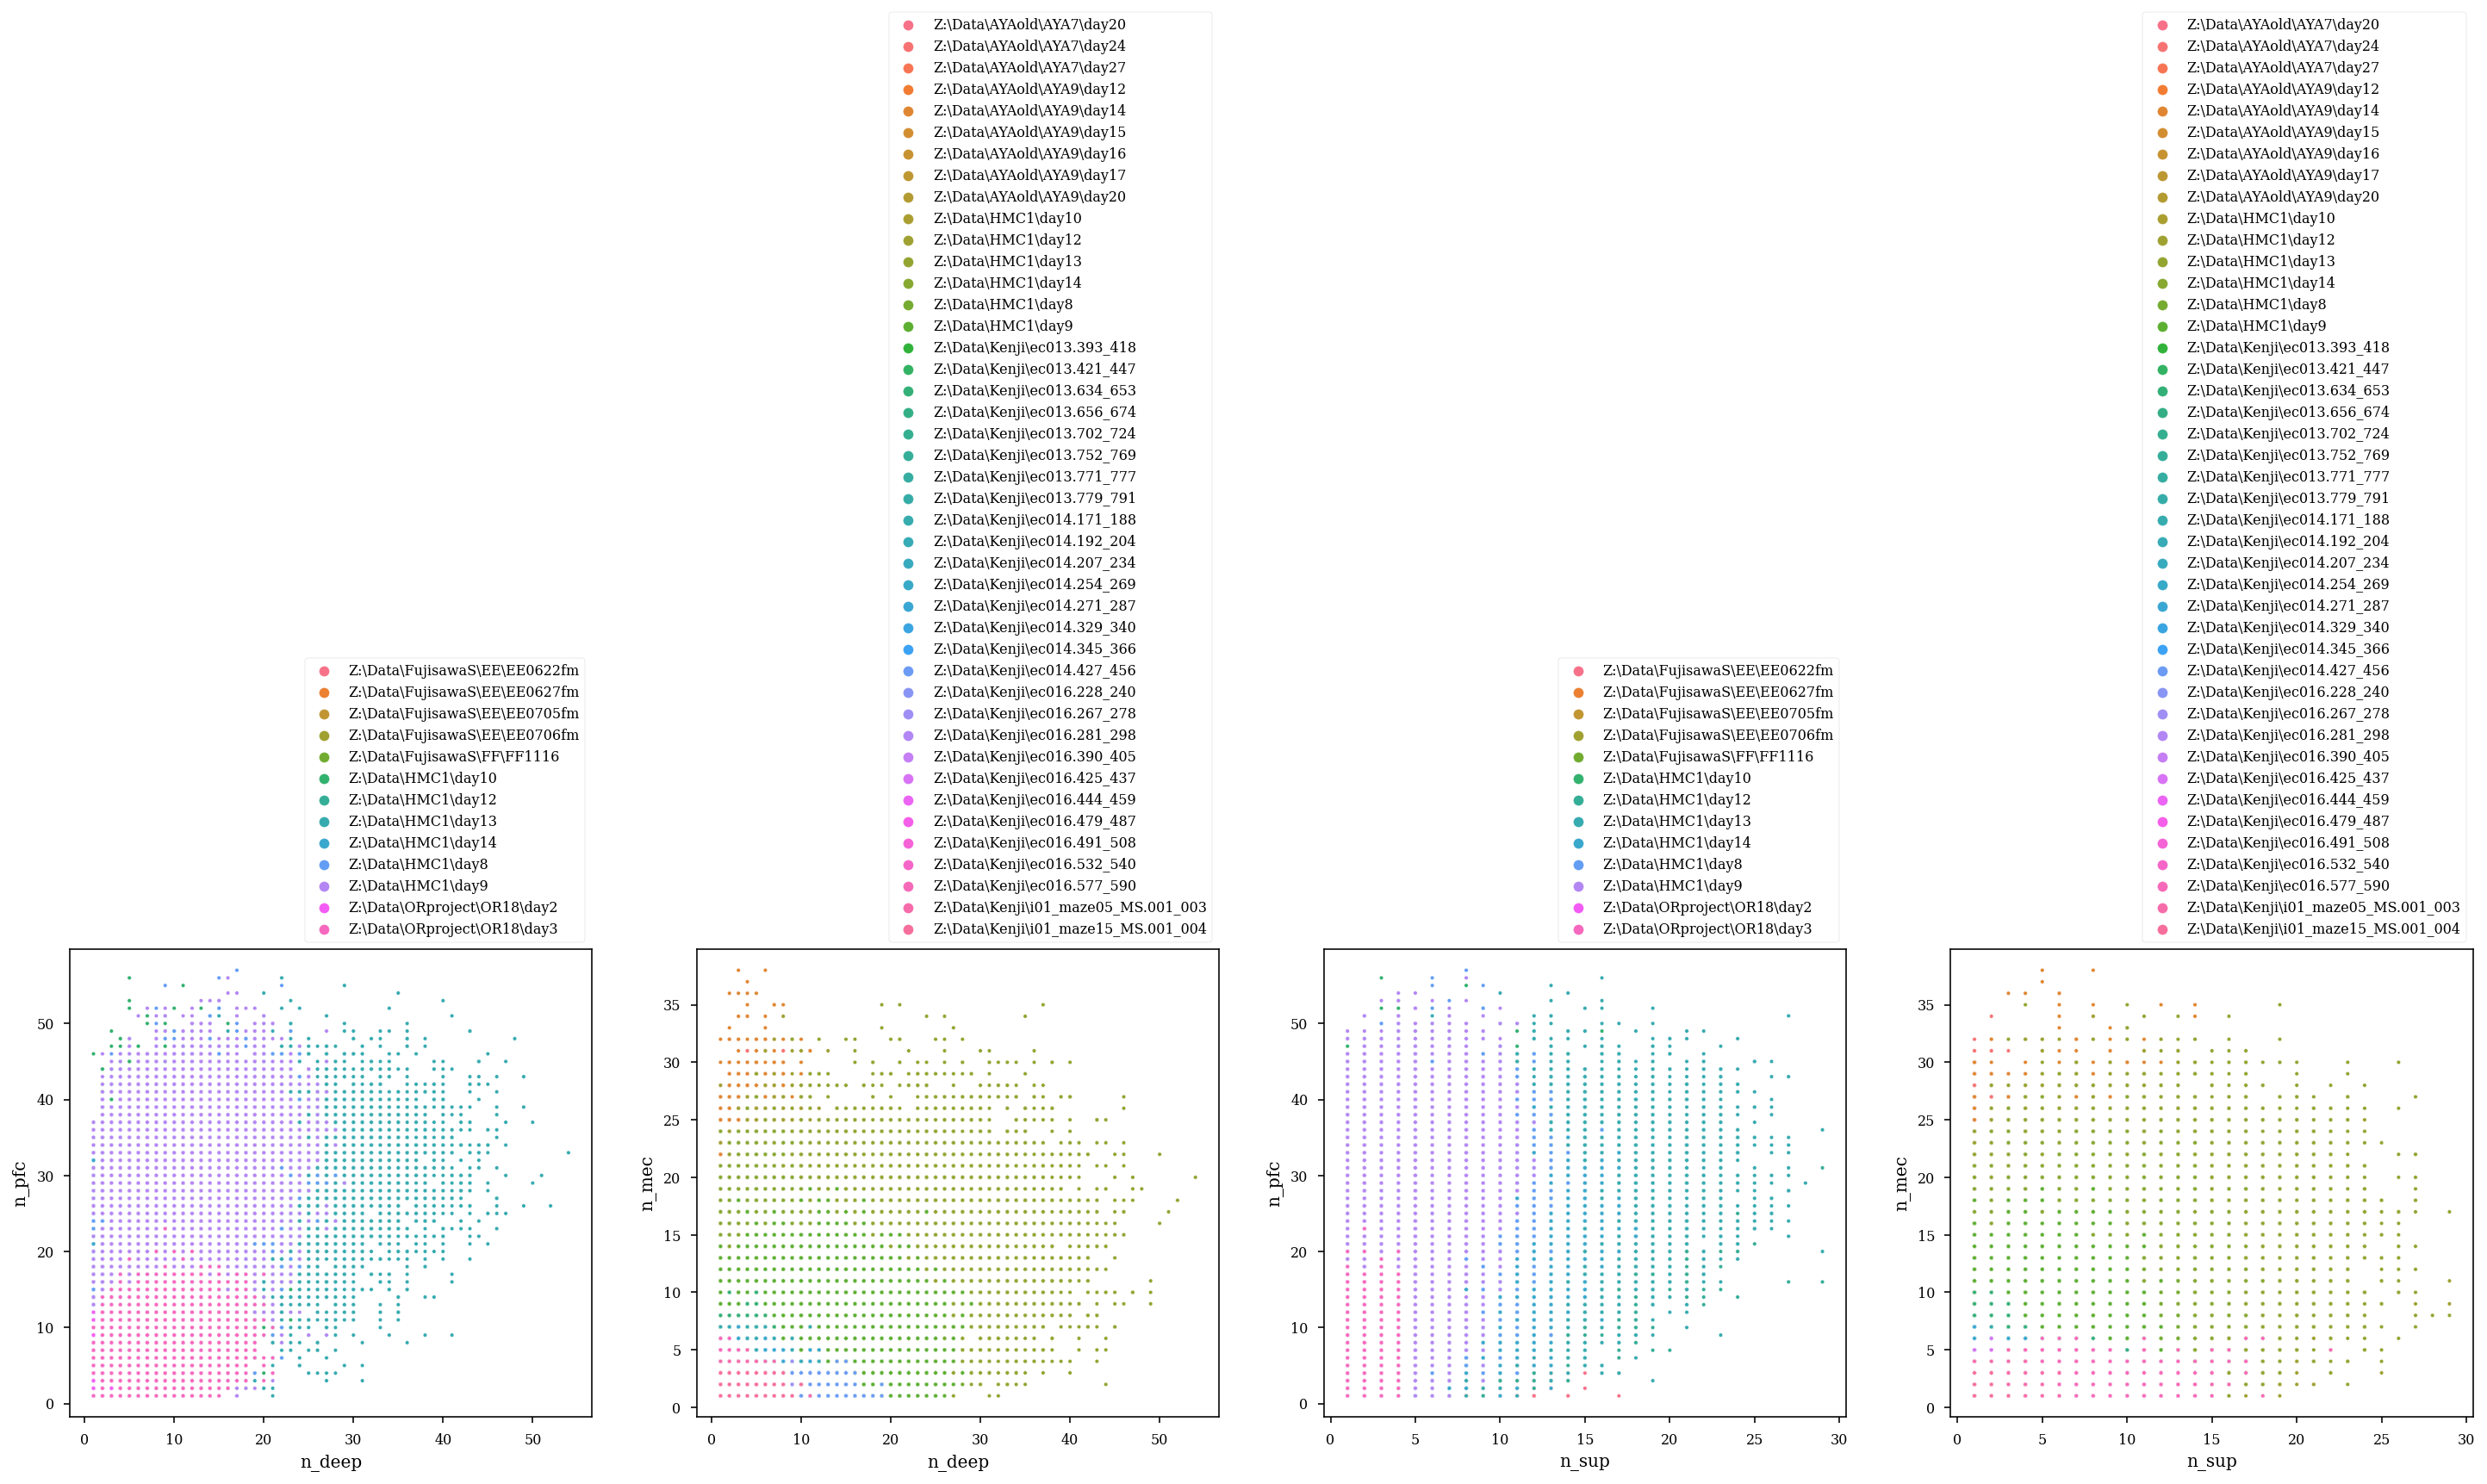

In [27]:
fig,ax = plt.subplots(1,4,figsize=(25,5))

sns.scatterplot(x="n_deep",y="n_pfc",hue="basepath",data=rip_resp_df.query("n_pfc>0 & n_deep>0"),ax=ax[0],s=5)
ax[0].legend(loc="lower right", bbox_to_anchor=(1, 1))

# plt.show()
sns.scatterplot(x="n_deep",y="n_mec",hue="basepath",data=rip_resp_df.query("n_mec>0 & n_deep>0"),ax=ax[1],s=5)
ax[1].legend(loc="lower right", bbox_to_anchor=(1, 1))

# plt.show()

sns.scatterplot(x="n_sup",y="n_pfc",hue="basepath",data=rip_resp_df.query("n_pfc>0 & n_sup>0"),ax=ax[2],s=5)
ax[2].legend(loc="lower right", bbox_to_anchor=(1, 1))

# plt.show()
sns.scatterplot(x="n_sup",y="n_mec",hue="basepath",data=rip_resp_df.query("n_mec>0 & n_sup>0"),ax=ax[3],s=5)
ax[3].legend(loc="lower right", bbox_to_anchor=(1, 1))


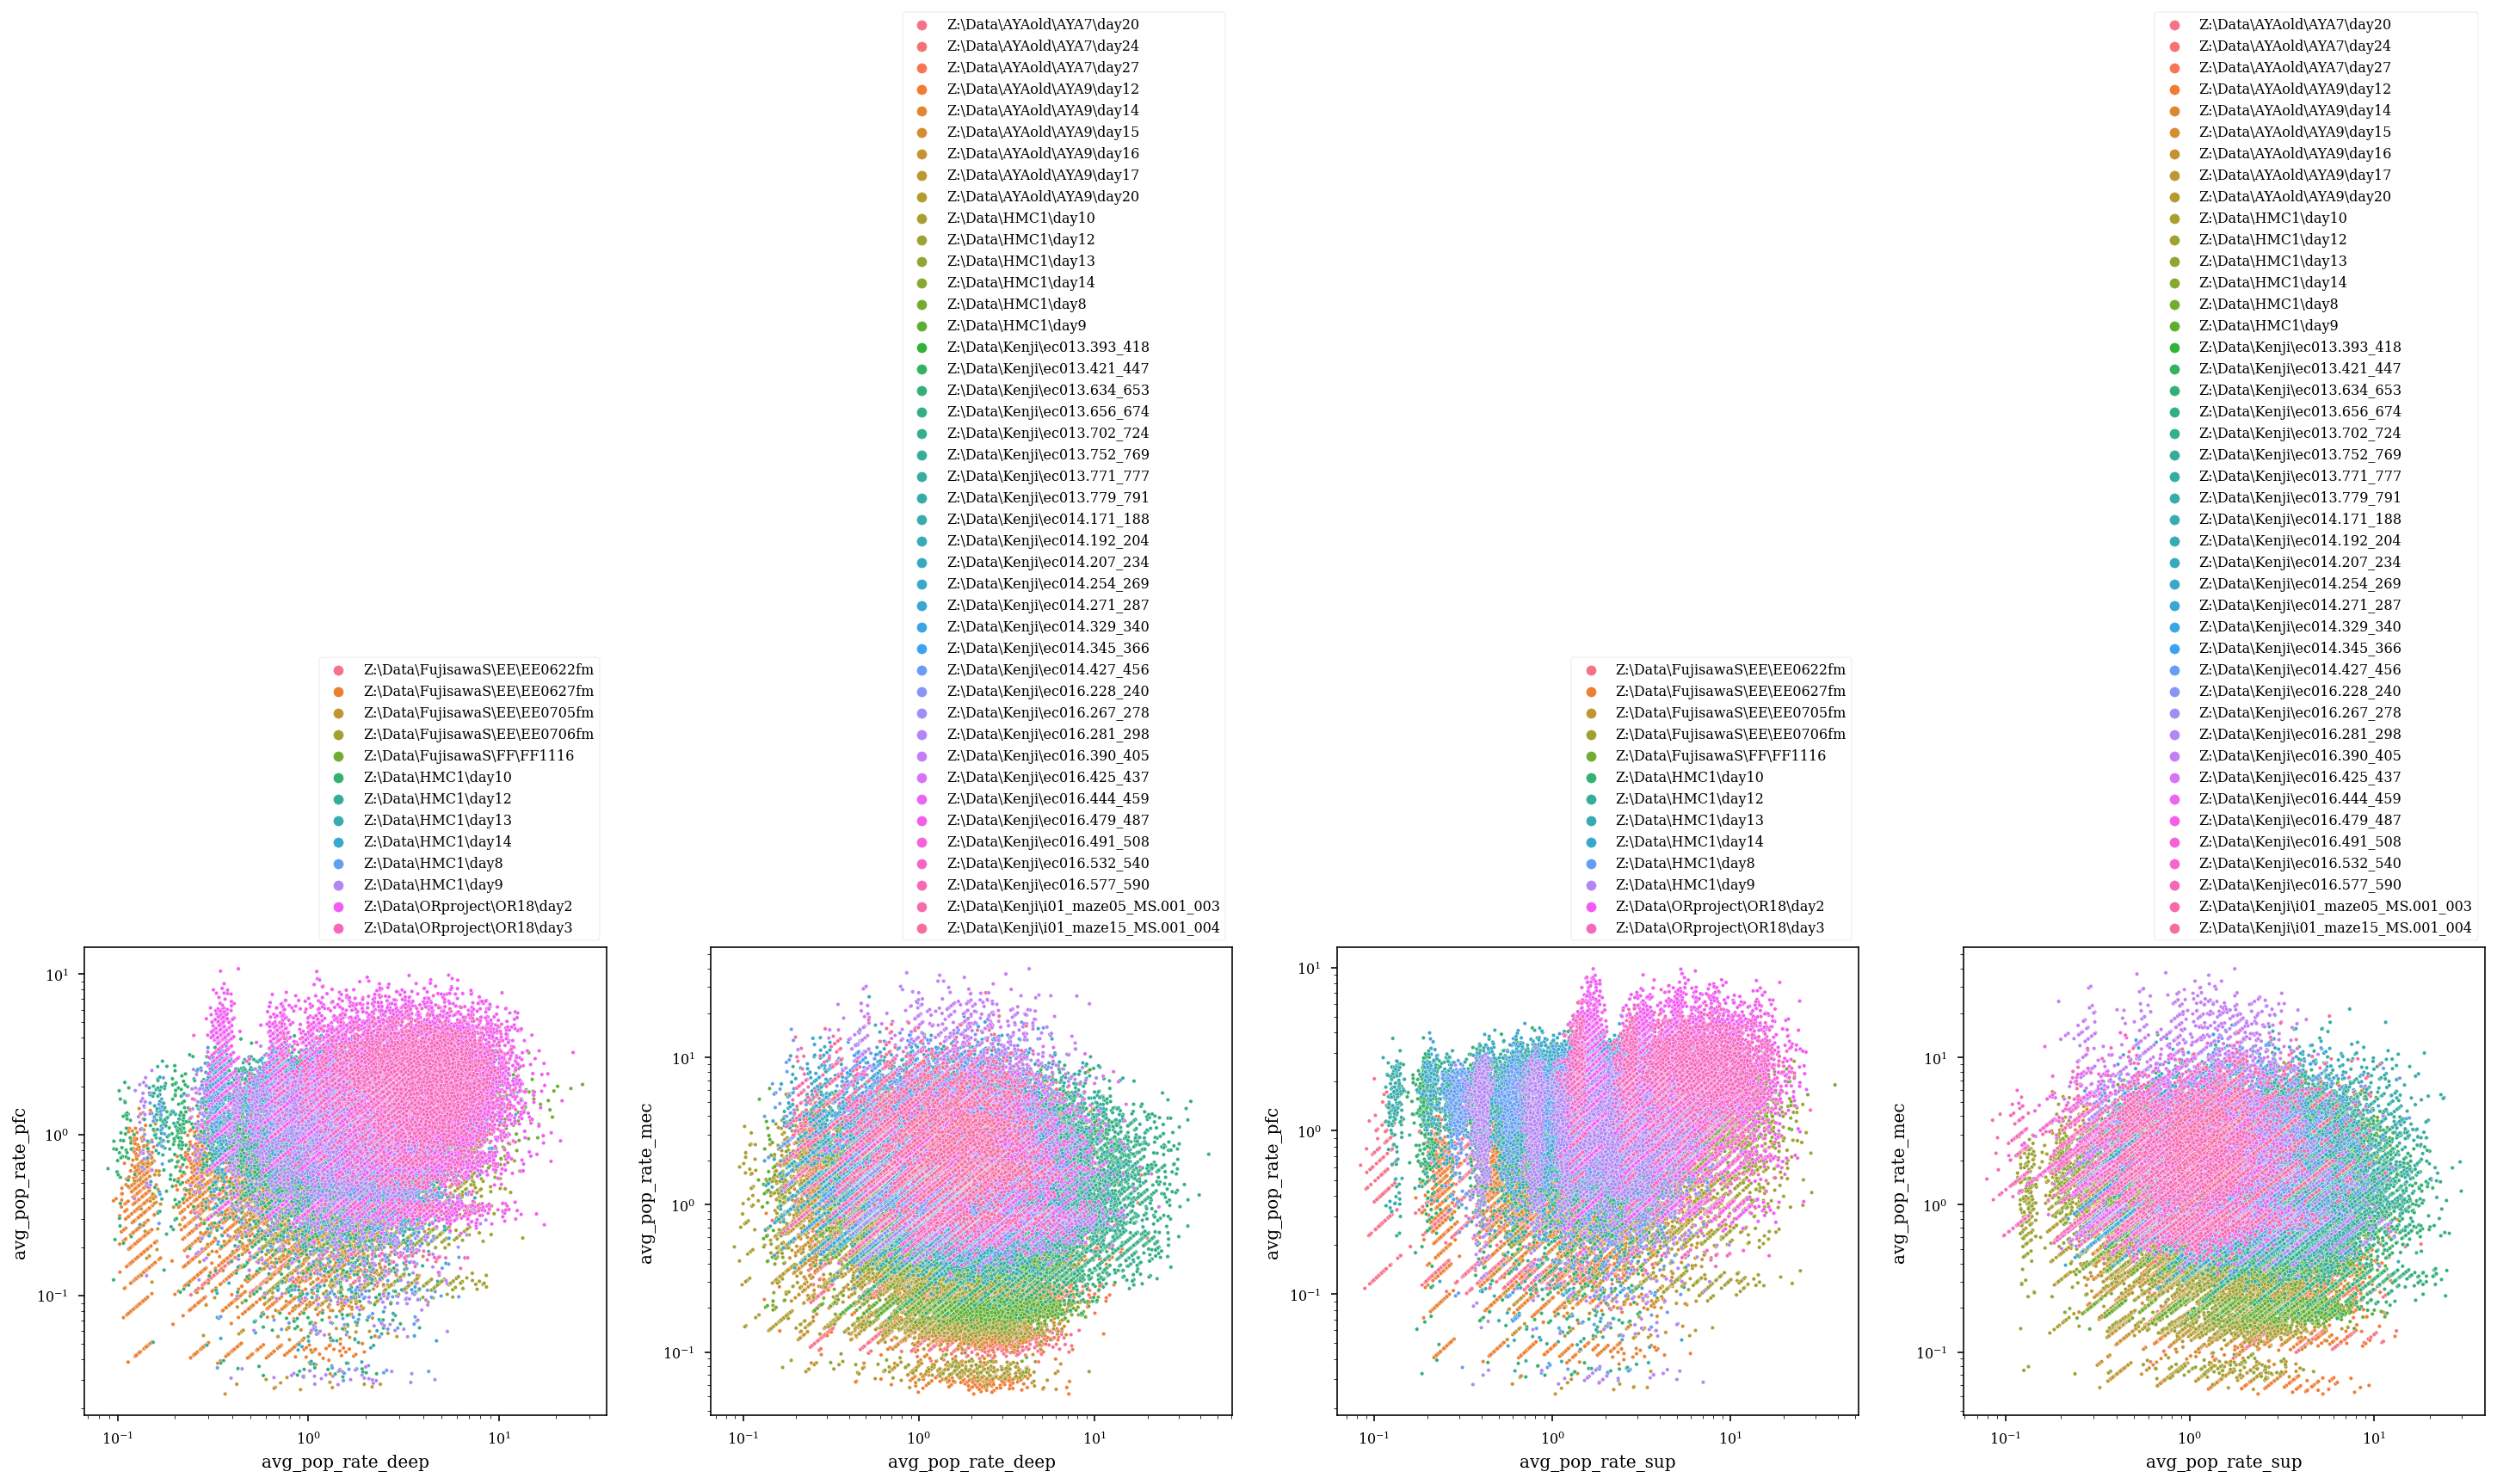

In [35]:
fig,ax = plt.subplots(1,4,figsize=(25,5))

sns.scatterplot(x="avg_pop_rate_deep",y="avg_pop_rate_pfc",hue="basepath",data=rip_resp_df.query("n_pfc>0 & n_deep>0"),ax=ax[0],s=5)
ax[0].legend(loc="lower right", bbox_to_anchor=(1, 1))
ax[0].set_xscale("log")
ax[0].set_yscale("log")
# plt.show()
sns.scatterplot(x="avg_pop_rate_deep",y="avg_pop_rate_mec",hue="basepath",data=rip_resp_df.query("n_mec>0 & n_deep>0"),ax=ax[1],s=5)
ax[1].legend(loc="lower right", bbox_to_anchor=(1, 1))
ax[1].set_xscale("log")
ax[1].set_yscale("log")

# plt.show()

sns.scatterplot(x="avg_pop_rate_sup",y="avg_pop_rate_pfc",hue="basepath",data=rip_resp_df.query("n_pfc>0 & n_sup>0"),ax=ax[2],s=5)
ax[2].legend(loc="lower right", bbox_to_anchor=(1, 1))
ax[2].set_xscale("log")
ax[2].set_yscale("log")
# plt.show()
sns.scatterplot(x="avg_pop_rate_sup",y="avg_pop_rate_mec",hue="basepath",data=rip_resp_df.query("n_mec>0 & n_sup>0"),ax=ax[3],s=5)
ax[3].legend(loc="lower right", bbox_to_anchor=(1, 1))
ax[3].set_xscale("log")
ax[3].set_yscale("log")

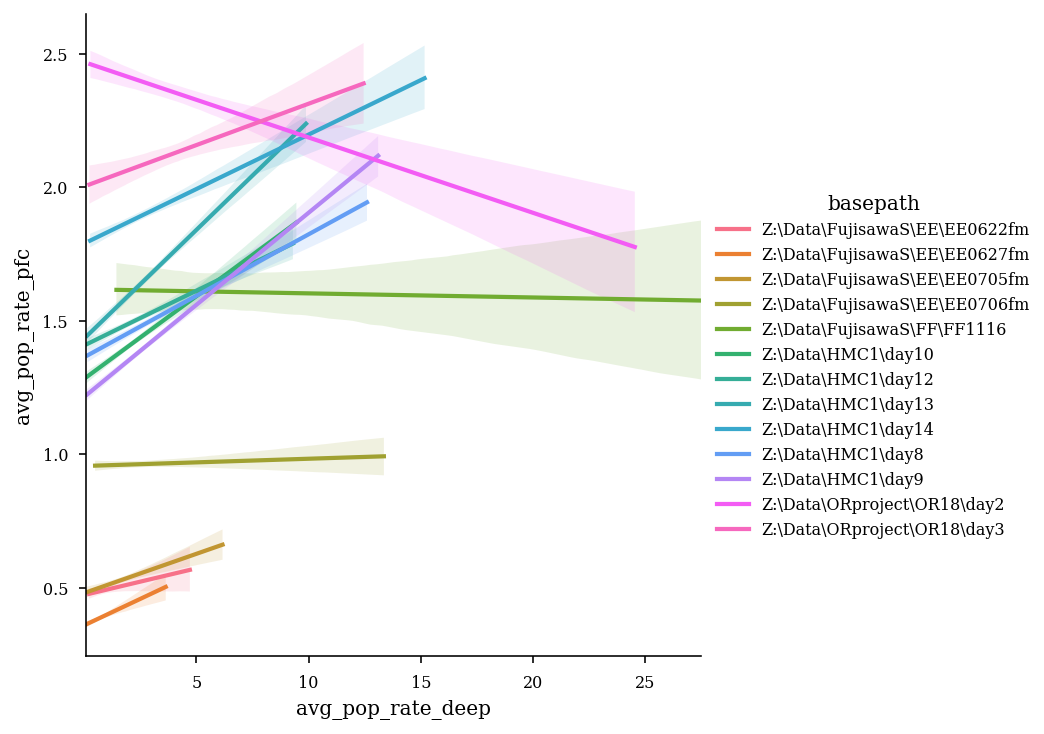

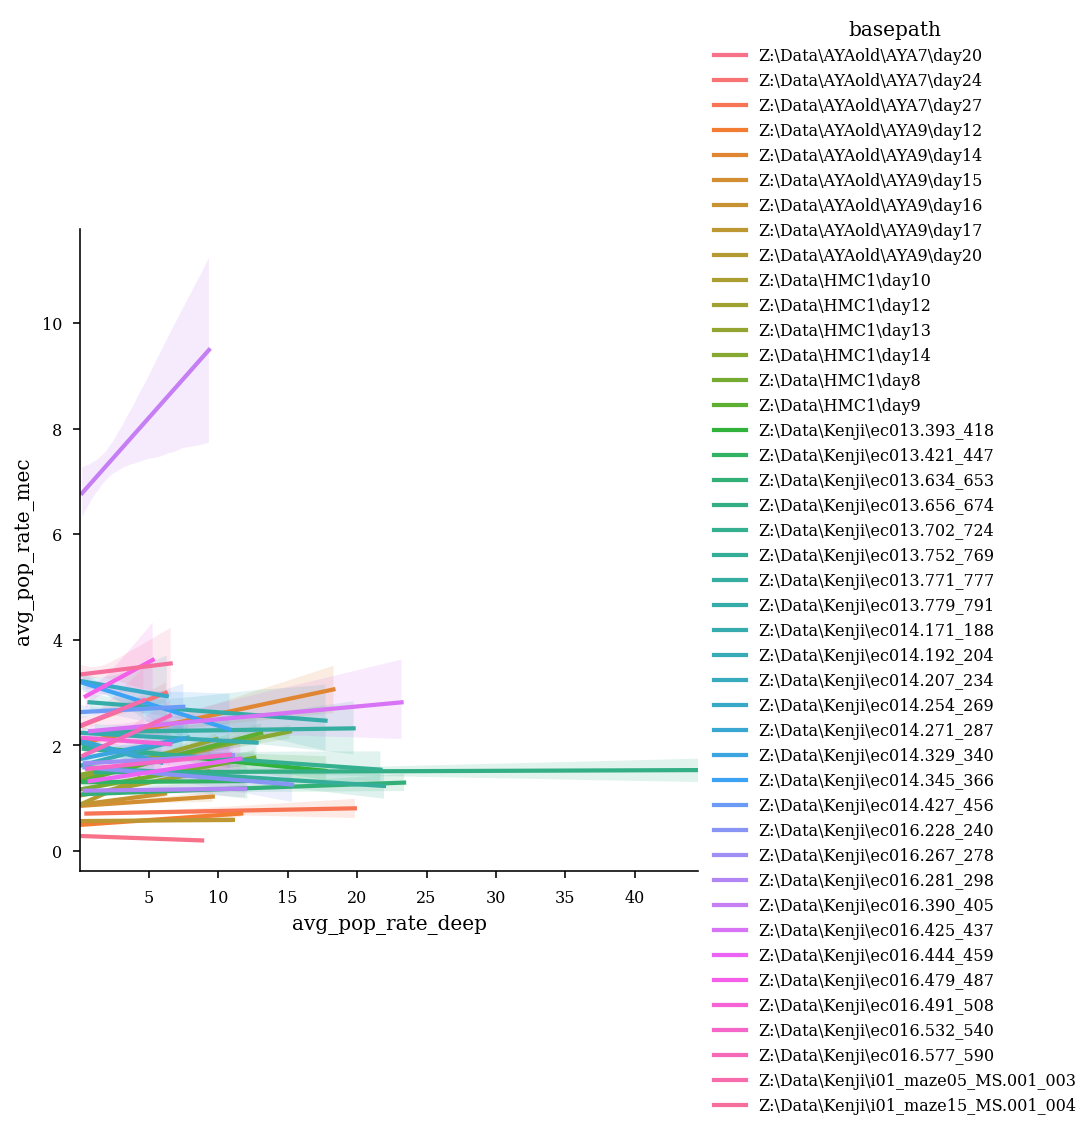

In [32]:
# sns.scatterplot(x="avg_pop_rate_deep",y="avg_pop_rate_pfc",hue="basepath",data=rip_resp_df.query("n_pfc>0 & n_deep>0"),ax=ax[0],s=5)

g = sns.lmplot(
    x="avg_pop_rate_deep",y="avg_pop_rate_pfc",hue="basepath",data=rip_resp_df.query("n_pfc>0 & n_deep>0"),
    scatter=False
)
plt.show()

g = sns.lmplot(
    x="avg_pop_rate_deep",y="avg_pop_rate_mec",hue="basepath",data=rip_resp_df.query("n_mec>0 & n_deep>0"),
    scatter=False
)

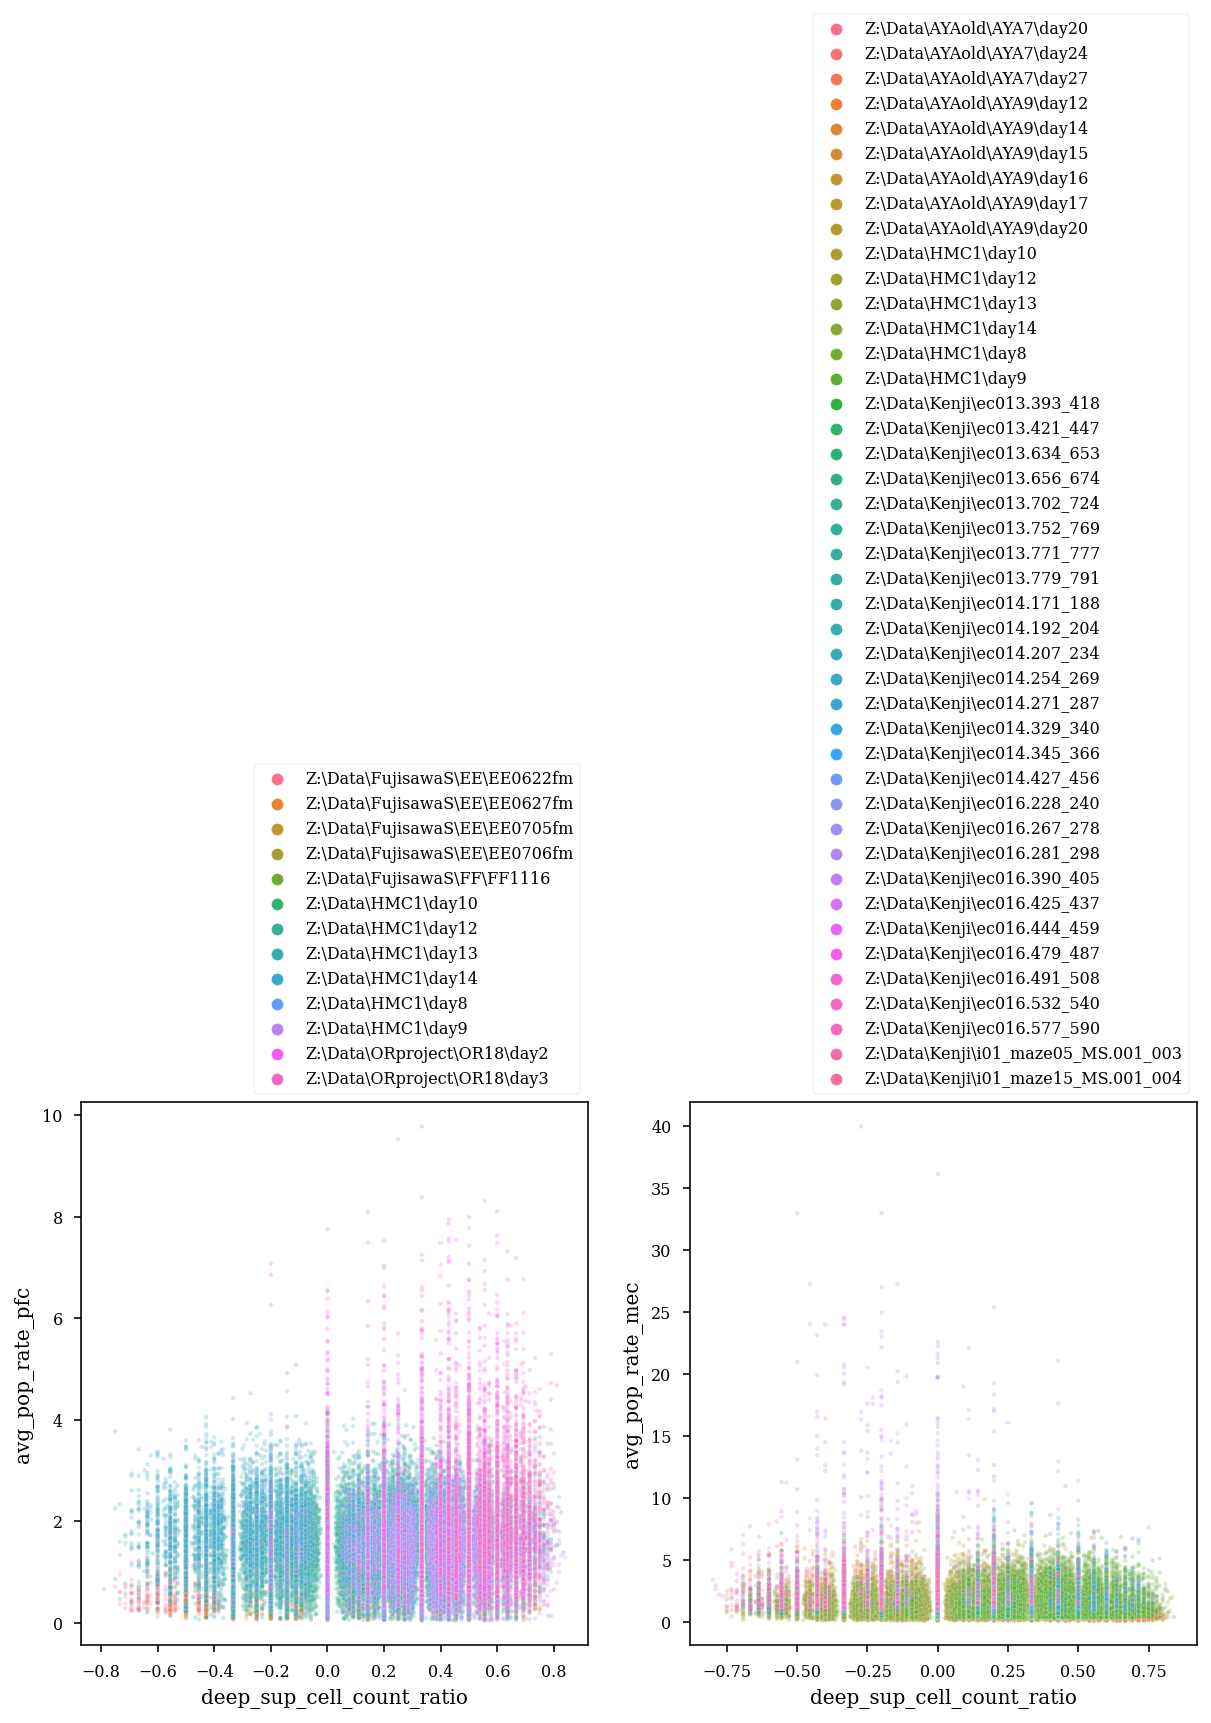

In [24]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

sns.scatterplot(x="deep_sup_cell_count_ratio",y="avg_pop_rate_pfc",hue="basepath",data=rip_resp_df.query("n_pfc>1 & n_deep>1 & n_sup>1"),ax=ax[0],alpha=.25,s=5)
ax[0].legend(loc="lower right", bbox_to_anchor=(1, 1))

sns.scatterplot(x="deep_sup_cell_count_ratio",y="avg_pop_rate_mec",hue="basepath",data=rip_resp_df.query("n_mec>1 & n_deep>1 & n_sup>1"),ax=ax[1],alpha=.25,s=5)
ax[1].legend(loc="lower right", bbox_to_anchor=(1, 1))




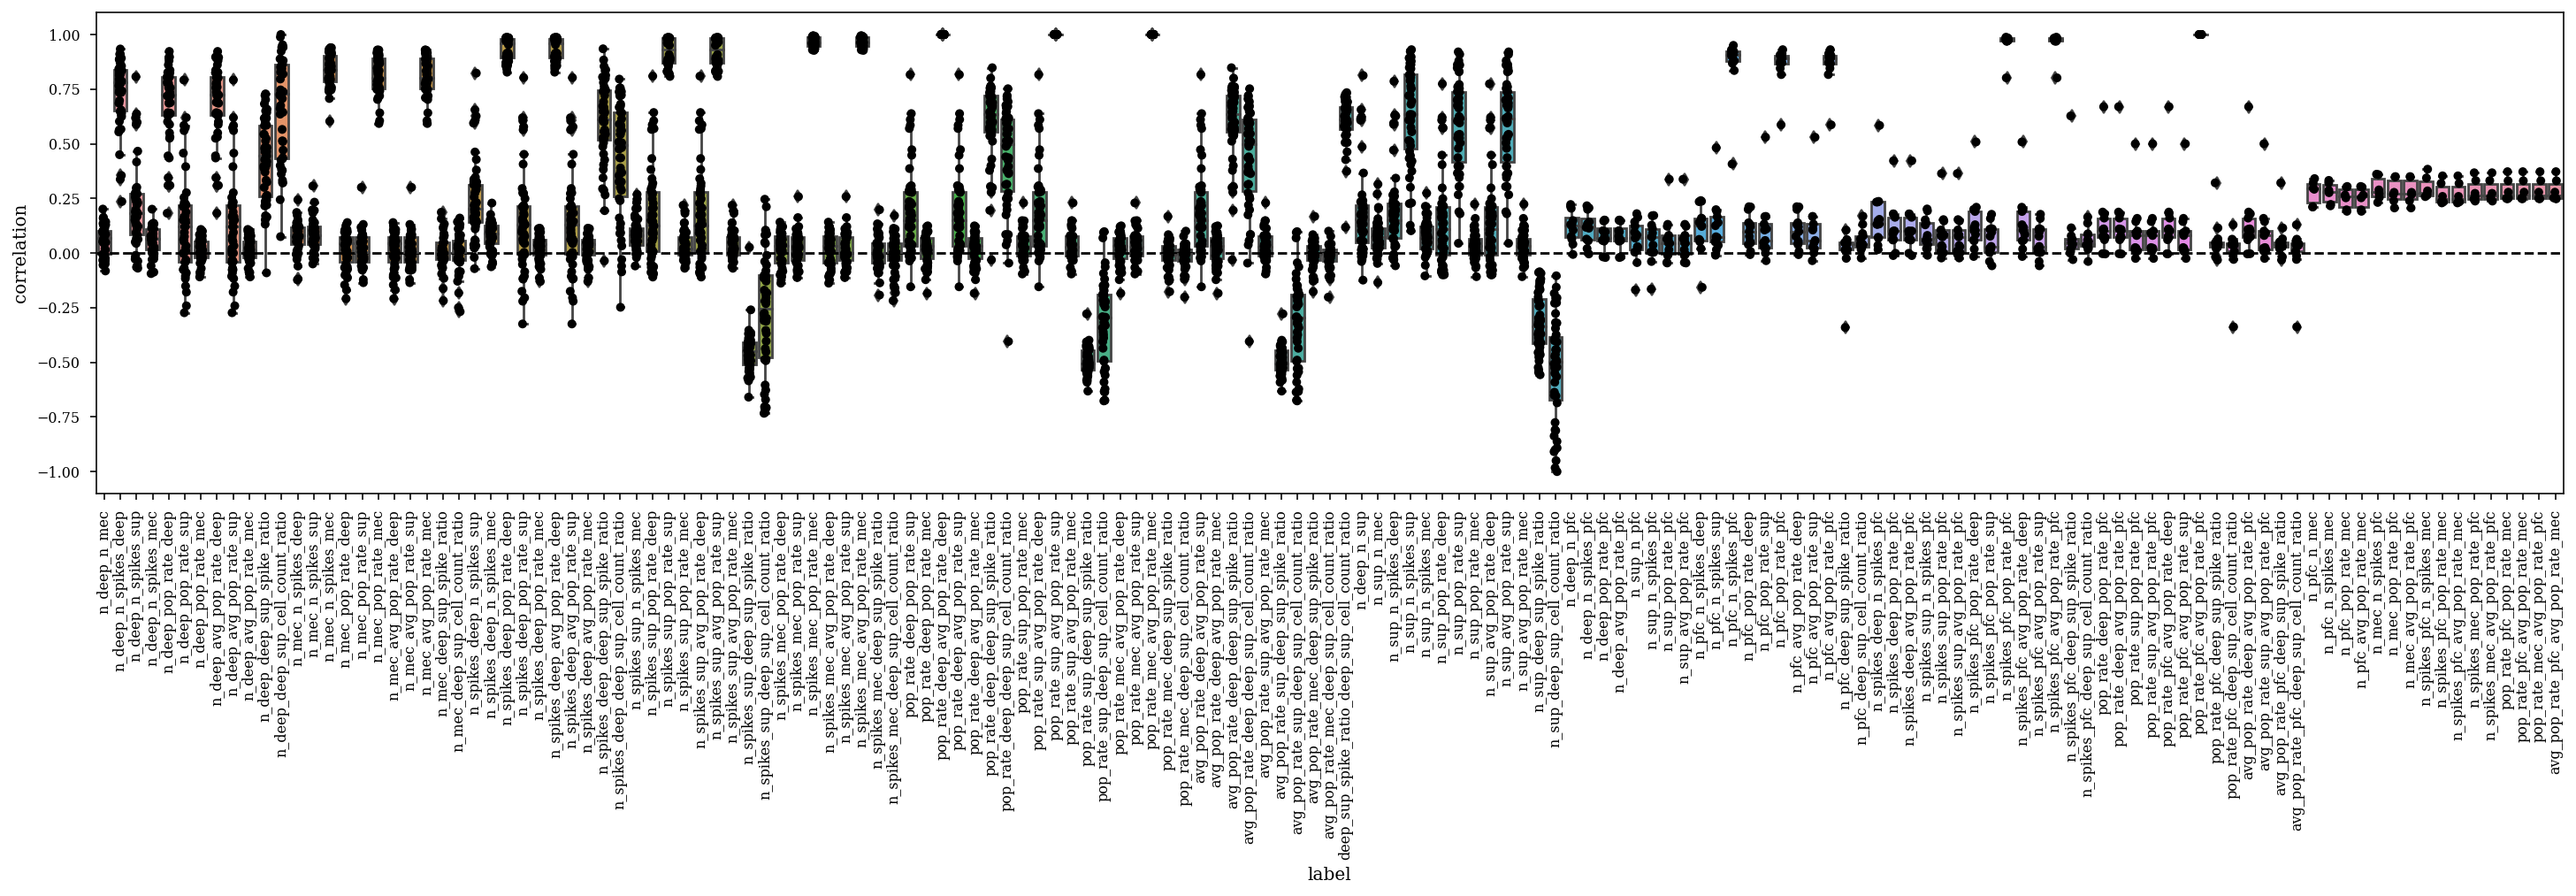

In [9]:
plt.figure(figsize=(25, 5))
sns.boxplot(x="label", y="correlation", data=df_layer_bias)
sns.stripplot(
    x="label", y="correlation", data=df_layer_bias, color="k", jitter=True, size=5
)
plt.axhline(0, color="k", linestyle="--")
plt.xticks(rotation=90)
plt.show()


(<AxesSubplot:xlabel='constant', ylabel='correlation'>,
  <statannotations.Annotation.Annotation at 0x1d9a8011c70>])

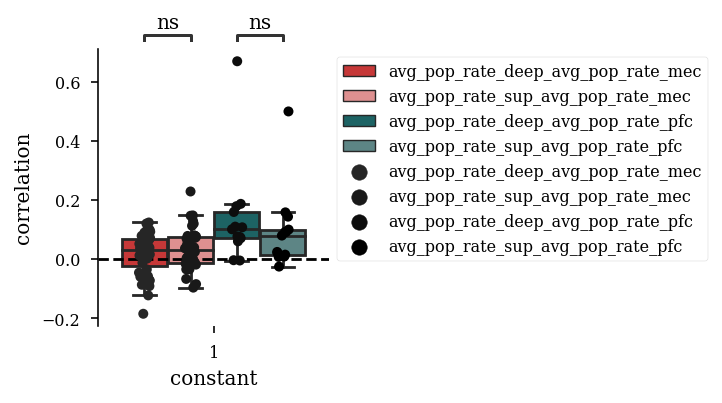

In [10]:
group_colors = {
    "avg_pop_rate_deep_avg_pop_rate_mec": "#de2020",
    "avg_pop_rate_sup_avg_pop_rate_mec": "#eb8383",
    "avg_pop_rate_deep_avg_pop_rate_pfc": "#116f70",
    "avg_pop_rate_sup_avg_pop_rate_pfc": "#568c8c",
}
labels = "avg_pop_rate_deep_avg_pop_rate_mec|avg_pop_rate_sup_avg_pop_rate_mec|avg_pop_rate_deep_avg_pop_rate_pfc|avg_pop_rate_sup_avg_pop_rate_pfc"
sns.set_palette(sns.color_palette(group_colors.values()))

df_layer_bias["constant"] = 1

fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=0.35, subplots=(2, 1)), edgecolor=None
)
sns.boxplot(
    x="constant",
    y="correlation",
    data=df_layer_bias[df_layer_bias.label.str.contains(labels)],
    hue="label",
    hue_order=group_colors.keys(),
    showfliers=False,
)
sns.stripplot(
    x="constant",
    y="correlation",
    data=df_layer_bias[df_layer_bias.label.str.contains(labels)],
    hue="label",
    hue_order=group_colors.keys(),
    color="k",
    dodge=True,
    jitter=True,
    size=5,
)

plt.axhline(0, color="k", linestyle="--")
sns.despine(bottom=True)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
# plt.ylabel("deep/sup vs. active cortical cells (r)")

box_pairs = [
    ((1, "avg_pop_rate_deep_avg_pop_rate_mec"), (1, "avg_pop_rate_sup_avg_pop_rate_mec")),
    ((1, "avg_pop_rate_deep_avg_pop_rate_pfc"), (1, "avg_pop_rate_sup_avg_pop_rate_pfc")),

]
annotator = Annotator(
    plt.gca(),
    box_pairs,
    data=df_layer_bias[df_layer_bias.label.str.contains(labels)],
    x="constant",
    y="correlation",
    hue="label",
    hue_order=group_colors.keys(),
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=0,
)
annotator.apply_and_annotate()

## relation between deep/sup cell count ratio and n cortical cells

(<AxesSubplot:xlabel='constant', ylabel='deep/sup vs. n cortical cells (r)'>,
 [<statannotations.Annotation.Annotation at 0x1da25851b80>])

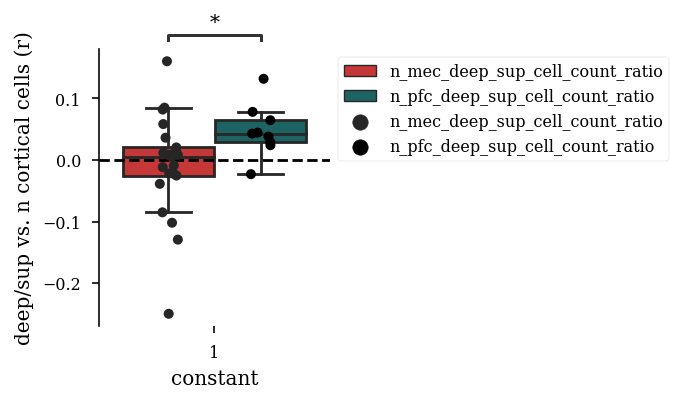

In [157]:
group_colors = {
    "n_mec_deep_sup_cell_count_ratio": "#de2020",
    "n_pfc_deep_sup_cell_count_ratio": "#116f70",
}
sns.set_palette(sns.color_palette(group_colors.values()))

idx = (
    (df_layer_bias.label == "n_mec_deep_sup_cell_count_ratio")
    & (df_layer_bias.n_sup > 5)
    & (df_layer_bias.n_deep > 5)
    & (df_layer_bias.n_mec > 5)
) | (
    (df_layer_bias.label == "n_pfc_deep_sup_cell_count_ratio")
    & (df_layer_bias.n_sup > 5)
    & (df_layer_bias.n_deep > 5)
    & (df_layer_bias.n_pfc > 5)
)

df_layer_bias["constant"] = 1

fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=0.35, subplots=(2, 1)), edgecolor=None
)
sns.boxplot(
    x="constant",
    y="correlation",
    data=df_layer_bias[idx],
    hue="label",
    hue_order=group_colors.keys(),
    showfliers=False,
)

sns.stripplot(
    x="constant",
    y="correlation",
    data=df_layer_bias[idx],
    hue="label",
    hue_order=group_colors.keys(),
    color="k",
    dodge=True,
    jitter=True,
    size=5,
)
plt.axhline(0, color="k", linestyle="--")
sns.despine(bottom=True)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.ylabel("deep/sup vs. n cortical cells (r)")

box_pairs = [
    ((1, "n_mec_deep_sup_cell_count_ratio"), (1, "n_pfc_deep_sup_cell_count_ratio")),
]
annotator = Annotator(
    plt.gca(),
    box_pairs,
    data=df_layer_bias[idx],
    x="constant",
    y="correlation",
    hue="label",
    hue_order=group_colors.keys(),
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=0,
)
annotator.apply_and_annotate()


In [210]:
from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline
# regressor = make_pipeline(StandardScaler(), LinearRegression())

def trans_and_regress(X,y):
    good_idx = ~(np.isnan(X) | np.isnan(y) | np.isinf(X) | np.isinf(y))
    if ~good_idx.any():
        return None, None, None
    X = X[good_idx]
    y = y[good_idx]

    X = np.log10(X)
    y = np.log10(y)

    good_idx = ~(np.isnan(X) | np.isnan(y) | np.isinf(X) | np.isinf(y))
    X = X[good_idx].reshape(-1, 1)
    y = y[good_idx]
    # scaler = StandardScaler()
    # X = scaler.fit_transform(X)
    reg = LinearRegression().fit(X,y)
    return reg, X, y

for basepath in df_layer_bias.basepath.unique():

    idx = (df_layer_bias.basepath == basepath) & (df_layer_bias.label == "n_mec_deep_sup_cell_count_ratio")
    # get x with offset as this ratio has negative values
    X = rip_resp_df.query("basepath==@basepath")[["deep_sup_cell_count_ratio"]].values + 1
    y = rip_resp_df.query("basepath==@basepath")[["n_mec"]].values
    if not y.any():
        df_layer_bias.loc[idx, "r2"] = np.nan
        df_layer_bias.loc[idx, "slope"] = np.nan
        continue
    reg, X, y = trans_and_regress(X,y)
    if reg is None:
        df_layer_bias.loc[idx, "r2"] = np.nan
        df_layer_bias.loc[idx, "slope"] = np.nan
    else:
        df_layer_bias.loc[idx, "r2"] = reg.score(X, y)
        df_layer_bias.loc[idx, "slope"] = reg.coef_[0]

    idx = (df_layer_bias.basepath == basepath) & (df_layer_bias.label == "n_pfc_deep_sup_cell_count_ratio")
    # get x with offset as this ratio has negative values
    X = rip_resp_df.query("basepath==@basepath")[["deep_sup_cell_count_ratio"]].values + 1
    y = rip_resp_df.query("basepath==@basepath")[["n_pfc"]].values
    if not y.any():
        df_layer_bias.loc[idx, "r2"] = np.nan
        df_layer_bias.loc[idx, "slope"] = np.nan
        continue
    reg, X, y = trans_and_regress(X,y)
    if reg is None:
        df_layer_bias.loc[idx, "r2"] = np.nan
        df_layer_bias.loc[idx, "slope"] = np.nan
    else:
        df_layer_bias.loc[idx, "r2"] = reg.score(X, y)
        df_layer_bias.loc[idx, "slope"] = reg.coef_[0]

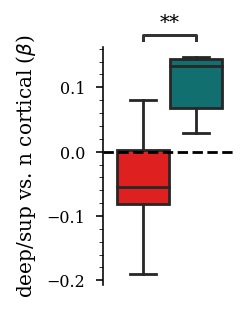

In [211]:
group_colors = {
    "n_mec_deep_sup_cell_count_ratio": "#de2020",
    "n_pfc_deep_sup_cell_count_ratio": "#116f70",
}
sns.set_palette(sns.color_palette(group_colors.values()))

idx = (
    (df_layer_bias.label == "n_mec_deep_sup_cell_count_ratio")
    & (df_layer_bias.n_sup > 5)
    & (df_layer_bias.n_deep > 5)
    & (df_layer_bias.n_mec > 5)
) | (
    (df_layer_bias.label == "n_pfc_deep_sup_cell_count_ratio")
    & (df_layer_bias.n_sup > 5)
    & (df_layer_bias.n_deep > 5)
    & (df_layer_bias.n_pfc > 5)
)

df_layer_bias["constant"] = 1

fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=0.2, subplots=(3, 1)), edgecolor=None
)
sns.boxplot(
    x="constant",
    y="slope",
    data=df_layer_bias[idx],
    hue="label",
    hue_order=group_colors.keys(),
    showfliers=False,
    saturation=1
)

# sns.stripplot(
#     x="constant",
#     y="slope",
#     data=df_layer_bias[idx],
#     hue="label",
#     hue_order=group_colors.keys(),
#     color="k",
#     dodge=True,
#     jitter=True,
#     size=5,
# )
plt.axhline(0, color="k", linestyle="--")
sns.despine(bottom=True)
# plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
# plt.ylabel("deep/sup vs. n cortical cells (r)")
plt.ylabel(r"deep/sup vs. n cortical ($\beta$)")

plt.legend([],[], frameon=False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())

box_pairs = [
    ((1, "n_mec_deep_sup_cell_count_ratio"), (1, "n_pfc_deep_sup_cell_count_ratio")),
]
annotator = Annotator(
    plt.gca(),
    box_pairs,
    data=df_layer_bias[idx],
    x="constant",
    y="slope",
    hue="label",
    hue_order=group_colors.keys(),
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=0,
)
annotator.apply_and_annotate()

plt.savefig(
    os.path.join(fig_save_path, "deep_sup_ratio_n_cortical_cells_n.svg"),
    dpi=300,
    bbox_inches="tight",
)

## simple correlation of deep/sup cell count ratio and avg pop rate

(<AxesSubplot:xlabel='constant', ylabel='deep/sup vs. cortical cells fr (r)'>,
 [<statannotations.Annotation.Annotation at 0x1da25ceb4c0>])

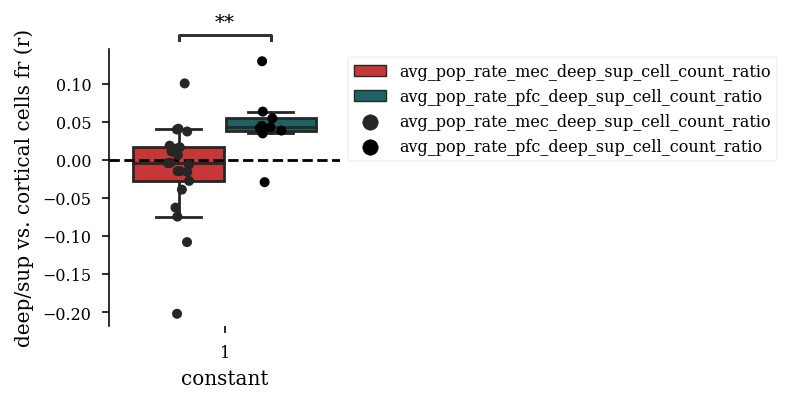

In [171]:
group_colors = {
    "avg_pop_rate_mec_deep_sup_cell_count_ratio": "#de2020",
    "avg_pop_rate_pfc_deep_sup_cell_count_ratio": "#116f70",
}
sns.set_palette(sns.color_palette(group_colors.values()))

idx = (
    (df_layer_bias.label == "avg_pop_rate_mec_deep_sup_cell_count_ratio")
    & (df_layer_bias.n_sup > 5)
    & (df_layer_bias.n_deep > 5)
    & (df_layer_bias.n_mec > 5)
) | (
    (df_layer_bias.label == "avg_pop_rate_pfc_deep_sup_cell_count_ratio")
    & (df_layer_bias.n_sup > 5)
    & (df_layer_bias.n_deep > 5)
    & (df_layer_bias.n_pfc > 5)
)

df_layer_bias["constant"] = 1

fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=0.35, subplots=(2, 1)), edgecolor=None
)
sns.boxplot(
    x="constant",
    y="correlation",
    data=df_layer_bias[idx],
    hue="label",
    hue_order=group_colors.keys(),
    showfliers=False,
)

sns.stripplot(
    x="constant",
    y="correlation",
    data=df_layer_bias[idx],
    hue="label",
    hue_order=group_colors.keys(),
    color="k",
    dodge=True,
    jitter=True,
    size=5,
)
plt.axhline(0, color="k", linestyle="--")
sns.despine(bottom=True)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.ylabel("deep/sup vs. cortical cells fr (r)")

box_pairs = [
    ((1, "avg_pop_rate_mec_deep_sup_cell_count_ratio"), (1, "avg_pop_rate_pfc_deep_sup_cell_count_ratio")),
]
annotator = Annotator(
    plt.gca(),
    box_pairs,
    data=df_layer_bias[idx],
    x="constant",
    y="correlation",
    hue="label",
    hue_order=group_colors.keys(),
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=0,
)
annotator.apply_and_annotate()


## recalculate relation with transformed data

### here I'm using deep/sup cell count ratio

In [204]:
from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline
# regressor = make_pipeline(StandardScaler(), LinearRegression())

def trans_and_regress(X,y):
    good_idx = ~(np.isnan(X) | np.isnan(y) | np.isinf(X) | np.isinf(y))
    if ~good_idx.any():
        return None, None, None
    X = X[good_idx]
    y = y[good_idx]

    X = np.log10(X)
    y = np.log10(y)

    good_idx = ~(np.isnan(X) | np.isnan(y) | np.isinf(X) | np.isinf(y))
    X = X[good_idx].reshape(-1, 1)
    y = y[good_idx]
    # scaler = StandardScaler()
    # X = scaler.fit_transform(X)
    reg = LinearRegression().fit(X,y)
    return reg, X, y

for basepath in df_layer_bias.basepath.unique():

    idx = (df_layer_bias.basepath == basepath) & (df_layer_bias.label == "avg_pop_rate_mec_deep_sup_cell_count_ratio")
    # get x with offset as this ratio has negative values
    X = rip_resp_df.query("basepath==@basepath")[["deep_sup_cell_count_ratio"]].values + 1
    y = rip_resp_df.query("basepath==@basepath")[["avg_pop_rate_mec"]].values
    reg, X, y = trans_and_regress(X,y)
    if reg is None:
        df_layer_bias.loc[idx, "r2"] = np.nan
        df_layer_bias.loc[idx, "slope"] = np.nan
    else:
        df_layer_bias.loc[idx, "r2"] = reg.score(X, y)
        df_layer_bias.loc[idx, "slope"] = reg.coef_[0]

    idx = (df_layer_bias.basepath == basepath) & (df_layer_bias.label == "avg_pop_rate_pfc_deep_sup_cell_count_ratio")
    # get x with offset as this ratio has negative values
    X = rip_resp_df.query("basepath==@basepath")[["deep_sup_cell_count_ratio"]].values + 1
    y = rip_resp_df.query("basepath==@basepath")[["avg_pop_rate_pfc"]].values
    reg, X, y = trans_and_regress(X,y)
    if reg is None:
        df_layer_bias.loc[idx, "r2"] = np.nan
        df_layer_bias.loc[idx, "slope"] = np.nan
    else:
        df_layer_bias.loc[idx, "r2"] = reg.score(X, y)
        df_layer_bias.loc[idx, "slope"] = reg.coef_[0]


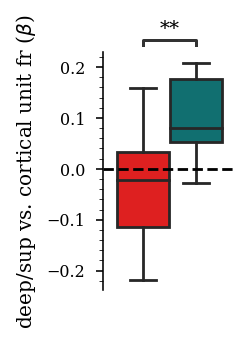

In [209]:
group_colors = {
    "avg_pop_rate_mec_deep_sup_cell_count_ratio": "#de2020",
    "avg_pop_rate_pfc_deep_sup_cell_count_ratio": "#116f70",
}
sns.set_palette(sns.color_palette(group_colors.values()))

idx = (
    (df_layer_bias.label == "avg_pop_rate_mec_deep_sup_cell_count_ratio")
    & (df_layer_bias.n_sup > 5)
    & (df_layer_bias.n_deep > 5)
    & (df_layer_bias.n_mec > 5)
) | (
    (df_layer_bias.label == "avg_pop_rate_pfc_deep_sup_cell_count_ratio")
    & (df_layer_bias.n_sup > 5)
    & (df_layer_bias.n_deep > 5)
    & (df_layer_bias.n_pfc > 5)
)

df_layer_bias["constant"] = 1

fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=0.2, subplots=(3, 1)), edgecolor=None
)
sns.boxplot(
    x="constant",
    y="slope",
    data=df_layer_bias[idx],
    hue="label",
    hue_order=group_colors.keys(),
    showfliers=False,
    saturation=1,
)
# sns.stripplot(
#     x="constant",
#     y="slope",
#     data=df_layer_bias[idx],
#     hue="label",
#     hue_order=group_colors.keys(),
#     color="k",
#     dodge=True,
#     jitter=True,
#     size=5,
# )
plt.axhline(0, color="k", linestyle="--")
sns.despine(bottom=True)
# plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.legend([],[], frameon=False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())

plt.ylabel(r"deep/sup vs. cortical unit fr ($\beta$)")

box_pairs = [
    ((1, "avg_pop_rate_mec_deep_sup_cell_count_ratio"), (1, "avg_pop_rate_pfc_deep_sup_cell_count_ratio")),
]
annotator = Annotator(
    plt.gca(),
    box_pairs,
    data=df_layer_bias[idx],
    x="constant",
    y="slope",
    hue="label",
    hue_order=group_colors.keys(),
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=0,
)
annotator.apply_and_annotate()

plt.savefig(
    os.path.join(fig_save_path, "deep_sup_ratio_n_cortical_cells_fr.svg"),
    dpi=300,
    bbox_inches="tight",
)

### here, I'm using spike count ratio

In [174]:
from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline
# regressor = make_pipeline(StandardScaler(), LinearRegression())

def trans_and_regress(X,y):
    good_idx = ~(np.isnan(X) | np.isnan(y) | np.isinf(X) | np.isinf(y))
    if ~good_idx.any():
        return None, None, None
    X = X[good_idx]
    y = y[good_idx]

    X = np.log10(X)
    y = np.log10(y)

    good_idx = ~(np.isnan(X) | np.isnan(y) | np.isinf(X) | np.isinf(y))
    X = X[good_idx].reshape(-1, 1)
    y = y[good_idx]
    # scaler = StandardScaler()
    # X = scaler.fit_transform(X)
    reg = LinearRegression().fit(X,y)
    return reg, X, y

for basepath in df_layer_bias.basepath.unique():

    idx = (df_layer_bias.basepath == basepath) & (df_layer_bias.label == "avg_pop_rate_mec_deep_sup_spike_ratio")
    # get x with offset as this ratio has negative values
    X = rip_resp_df.query("basepath==@basepath")[["deep_sup_spike_ratio"]].values + 1
    y = rip_resp_df.query("basepath==@basepath")[["avg_pop_rate_mec"]].values
    reg, X, y = trans_and_regress(X,y)
    if reg is None:
        df_layer_bias.loc[idx, "r2"] = np.nan
        df_layer_bias.loc[idx, "slope"] = np.nan
    else:
        df_layer_bias.loc[idx, "r2"] = reg.score(X, y)
        df_layer_bias.loc[idx, "slope"] = reg.coef_[0]

    idx = (df_layer_bias.basepath == basepath) & (df_layer_bias.label == "avg_pop_rate_pfc_deep_sup_spike_ratio")
    # get x with offset as this ratio has negative values
    X = rip_resp_df.query("basepath==@basepath")[["deep_sup_spike_ratio"]].values + 1
    y = rip_resp_df.query("basepath==@basepath")[["avg_pop_rate_pfc"]].values
    reg, X, y = trans_and_regress(X,y)
    if reg is None:
        df_layer_bias.loc[idx, "r2"] = np.nan
        df_layer_bias.loc[idx, "slope"] = np.nan
    else:
        df_layer_bias.loc[idx, "r2"] = reg.score(X, y)
        df_layer_bias.loc[idx, "slope"] = reg.coef_[0]


(<AxesSubplot:xlabel='constant', ylabel='deep/sup vs. cortical cells fr (slope)'>,
 [<statannotations.Annotation.Annotation at 0x1da2673b0d0>])

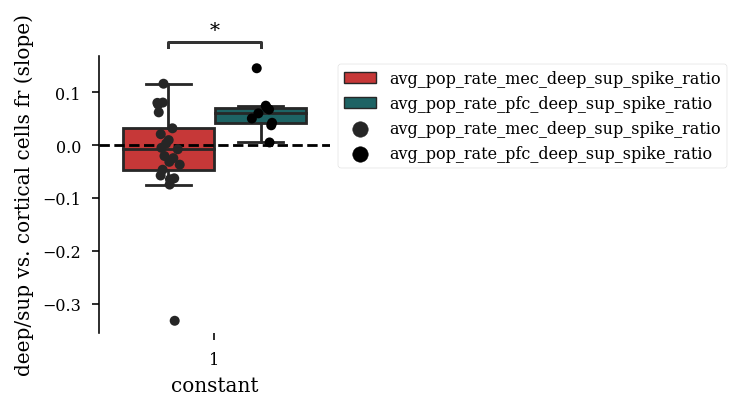

In [175]:
group_colors = {
    "avg_pop_rate_mec_deep_sup_spike_ratio": "#de2020",
    "avg_pop_rate_pfc_deep_sup_spike_ratio": "#116f70",
}
sns.set_palette(sns.color_palette(group_colors.values()))

idx = (
    (df_layer_bias.label == "avg_pop_rate_mec_deep_sup_spike_ratio")
    & (df_layer_bias.n_sup > 5)
    & (df_layer_bias.n_deep > 5)
    & (df_layer_bias.n_mec > 5)
) | (
    (df_layer_bias.label == "avg_pop_rate_pfc_deep_sup_spike_ratio")
    & (df_layer_bias.n_sup > 5)
    & (df_layer_bias.n_deep > 5)
    & (df_layer_bias.n_pfc > 5)
)

df_layer_bias["constant"] = 1

fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=0.35, subplots=(2, 1)), edgecolor=None
)
sns.boxplot(
    x="constant",
    y="slope",
    data=df_layer_bias[idx],
    hue="label",
    hue_order=group_colors.keys(),
    showfliers=False,
)

sns.stripplot(
    x="constant",
    y="slope",
    data=df_layer_bias[idx],
    hue="label",
    hue_order=group_colors.keys(),
    color="k",
    dodge=True,
    jitter=True,
    size=5,
)
plt.axhline(0, color="k", linestyle="--")
sns.despine(bottom=True)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.ylabel("deep/sup vs. cortical cells fr (slope)")

box_pairs = [
    ((1, "avg_pop_rate_mec_deep_sup_spike_ratio"), (1, "avg_pop_rate_pfc_deep_sup_spike_ratio")),
]
annotator = Annotator(
    plt.gca(),
    box_pairs,
    data=df_layer_bias[idx],
    x="constant",
    y="slope",
    hue="label",
    hue_order=group_colors.keys(),
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=0,
)
annotator.apply_and_annotate()


In [124]:
idx = (
    (df_layer_bias.label == "avg_pop_rate_pfc_deep_sup_cell_count_ratio")
    & (df_layer_bias.n_sup > 5)
    & (df_layer_bias.n_deep > 5)
    & (df_layer_bias.correlation > 0)
)
df_layer_bias[idx]

correlation                                       label  n_deep  n_sup  \
986      0.043011  avg_pop_rate_pfc_deep_sup_cell_count_ratio      36     20   
1077     0.034782  avg_pop_rate_pfc_deep_sup_cell_count_ratio      34      8   
1397     0.129401  avg_pop_rate_pfc_deep_sup_cell_count_ratio      45     24   
1550     0.038524  avg_pop_rate_pfc_deep_sup_cell_count_ratio      29     37   
1703     0.041675  avg_pop_rate_pfc_deep_sup_cell_count_ratio      71     37   
1856     0.054503  avg_pop_rate_pfc_deep_sup_cell_count_ratio      14     23   
2009     0.063369  avg_pop_rate_pfc_deep_sup_cell_count_ratio      30     16   
2162     0.044679  avg_pop_rate_pfc_deep_sup_cell_count_ratio      36     12   

      n_pfc  n_mec                       basepath  constant        r2  \
986     106      0  Z:\Data\FujisawaS\EE\EE0627fm         1  0.001612   
1077    170      0  Z:\Data\FujisawaS\EE\EE0705fm         1  0.000018   
1397    137     31             Z:\Data\HMC1\day10         1  0.015482   
1550     87     62             Z:\Data\HMC1\day12         1  0.001520   
1703    135     63             Z:\Data\HMC1\day13         1  0.003327   
1856     90     52             Z:\Data\HMC1\day14         1  0.000239   
2009    141     23              Z:\Data\HMC1\day8         1  0.002359   
2162    154     24              Z:\Data\HMC1\day9         1  0.002848   

         slope  
986   0.029559  
1077  0.003430  
1397  0.103133  
1550  0.028800  
1703  0.054475  
1856  0.009558  
2009  0.040191  
2162  0.046206

In [145]:
X = rip_resp_df.query("basepath=='Z:\Data\HMC1\day10' & deep_sup_cell_count_ratio != inf")[["deep_sup_spike_ratio"]].values + 1
y = rip_resp_df.query("basepath=='Z:\Data\HMC1\day10' & deep_sup_cell_count_ratio != inf")[["avg_pop_rate_mec"]].values


good_idx = ~(np.isnan(X) | np.isnan(y) | np.isinf(X) | np.isinf(y))
X = X[good_idx]
y = y[good_idx]

X = np.log10(X)
y = np.log10(y)

good_idx = ~(np.isnan(X) | np.isnan(y) | np.isinf(X) | np.isinf(y))
X = X[good_idx].reshape(-1, 1)
y = y[good_idx]
reg = LinearRegression().fit(X,y)
reg.coef_

array([0.02078052])

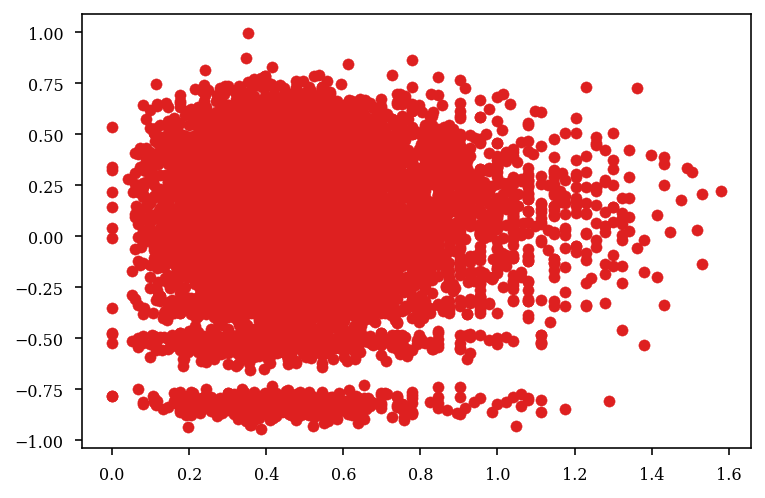

In [146]:
plt.scatter(X,y)

<AxesSubplot:>

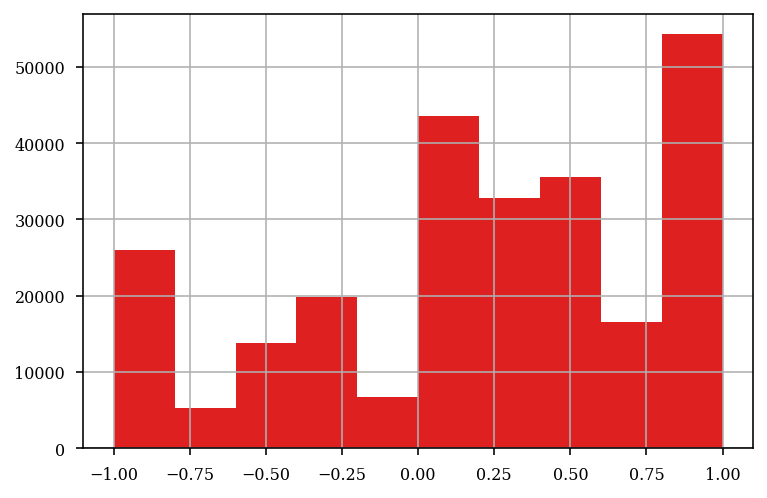

In [140]:
rip_resp_df.deep_sup_cell_count_ratio.hist()

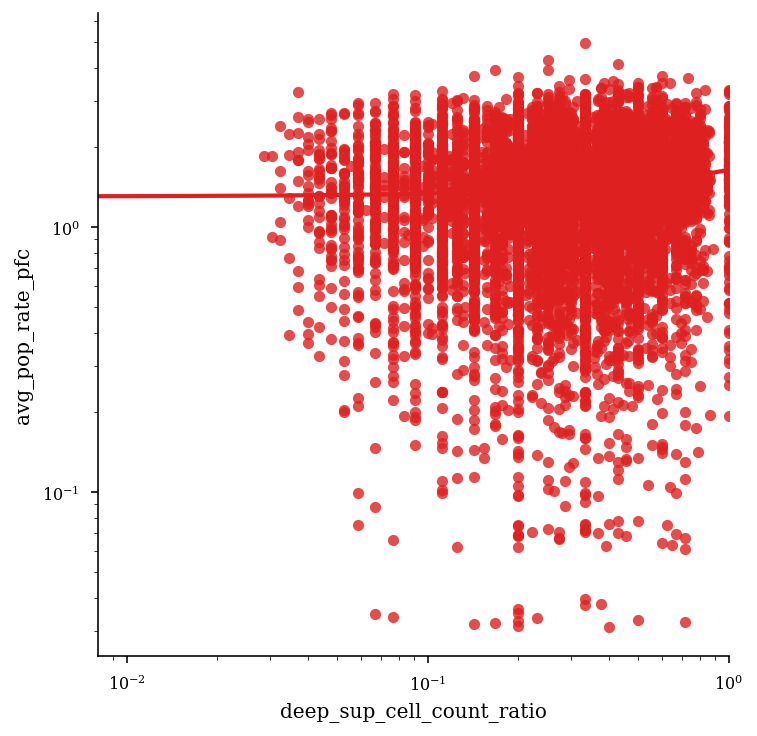

In [148]:

sns.lmplot(data=rip_resp_df.query("basepath=='Z:\Data\HMC1\day10' & deep_sup_cell_count_ratio != inf"),x="deep_sup_cell_count_ratio",y="avg_pop_rate_pfc")
plt.xscale("log")
plt.yscale("log")

In [44]:
idx = (
    (df_layer_bias.label == "avg_pop_rate_mec_deep_sup_cell_count_ratio")
    & (df_layer_bias.n_sup > 5)
    & (df_layer_bias.n_deep > 5)
) | (
    (df_layer_bias.label == "avg_pop_rate_pfc_deep_sup_cell_count_ratio")
    & (df_layer_bias.n_sup > 5)
    & (df_layer_bias.n_deep > 5)
)
df_layer_bias[idx]


correlation                                       label  n_deep  n_sup  \
167      0.011099  avg_pop_rate_mec_deep_sup_cell_count_ratio      19      7   
349      0.037288  avg_pop_rate_mec_deep_sup_cell_count_ratio      34      7   
440     -0.201727  avg_pop_rate_mec_deep_sup_cell_count_ratio      16     19   
531     -0.014846  avg_pop_rate_mec_deep_sup_cell_count_ratio      20     15   
622      0.018715  avg_pop_rate_mec_deep_sup_cell_count_ratio      23     11   
713     -0.014712  avg_pop_rate_mec_deep_sup_cell_count_ratio      22     12   
804      0.040904  avg_pop_rate_mec_deep_sup_cell_count_ratio      29     11   
895     -0.029126  avg_pop_rate_pfc_deep_sup_cell_count_ratio      15     44   
986      0.043011  avg_pop_rate_pfc_deep_sup_cell_count_ratio      36     20   
1077     0.034782  avg_pop_rate_pfc_deep_sup_cell_count_ratio      34      8   
1397     0.129401  avg_pop_rate_pfc_deep_sup_cell_count_ratio      45     24   
1399     0.006424  avg_pop_rate_mec_deep_sup_cell_count_ratio      45     24   
1550     0.038524  avg_pop_rate_pfc_deep_sup_cell_count_ratio      29     37   
1552     0.039846  avg_pop_rate_mec_deep_sup_cell_count_ratio      29     37   
1703     0.041675  avg_pop_rate_pfc_deep_sup_cell_count_ratio      71     37   
1705    -0.027478  avg_pop_rate_mec_deep_sup_cell_count_ratio      71     37   
1856     0.054503  avg_pop_rate_pfc_deep_sup_cell_count_ratio      14     23   
1858     0.016668  avg_pop_rate_mec_deep_sup_cell_count_ratio      14     23   
2009     0.063369  avg_pop_rate_pfc_deep_sup_cell_count_ratio      30     16   
2011    -0.003804  avg_pop_rate_mec_deep_sup_cell_count_ratio      30     16   
2162     0.044679  avg_pop_rate_pfc_deep_sup_cell_count_ratio      36     12   
2164    -0.004059  avg_pop_rate_mec_deep_sup_cell_count_ratio      36     12   
2255    -0.062514  avg_pop_rate_mec_deep_sup_cell_count_ratio      10      8   
2346    -0.107727  avg_pop_rate_mec_deep_sup_cell_count_ratio      12      7   
3295     0.100354  avg_pop_rate_mec_deep_sup_cell_count_ratio      21      7   
3386     0.014719  avg_pop_rate_mec_deep_sup_cell_count_ratio      10     11   
3659    -0.074287  avg_pop_rate_mec_deep_sup_cell_count_ratio       6     13   
3750    -0.015561  avg_pop_rate_mec_deep_sup_cell_count_ratio       9     16   
3932    -0.005417  avg_pop_rate_mec_deep_sup_cell_count_ratio      11     19   
4296    -0.066864  avg_pop_rate_mec_deep_sup_cell_count_ratio       8     31   
4478    -0.005974  avg_pop_rate_mec_deep_sup_cell_count_ratio       8     44   
4569    -0.038915  avg_pop_rate_mec_deep_sup_cell_count_ratio      23     10   

      n_pfc  n_mec                             basepath  constant  
167       0     50            Z:\Data\AYAold\AYA7\day24         1  
349       0     79            Z:\Data\AYAold\AYA9\day12         1  
440       0     51            Z:\Data\AYAold\AYA9\day14         1  
531       0     58            Z:\Data\AYAold\AYA9\day15         1  
622       0     39            Z:\Data\AYAold\AYA9\day16         1  
713       0     68            Z:\Data\AYAold\AYA9\day17         1  
804       0     29            Z:\Data\AYAold\AYA9\day20         1  
895      36      0        Z:\Data\FujisawaS\EE\EE0622fm         1  
986     106      0        Z:\Data\FujisawaS\EE\EE0627fm         1  
1077    170      0        Z:\Data\FujisawaS\EE\EE0705fm         1  
1397    137     31                   Z:\Data\HMC1\day10         1  
1399    137     31                   Z:\Data\HMC1\day10         1  
1550     87     62                   Z:\Data\HMC1\day12         1  
1552     87     62                   Z:\Data\HMC1\day12         1  
1703    135     63                   Z:\Data\HMC1\day13         1  
1705    135     63                   Z:\Data\HMC1\day13         1  
1856     90     52                   Z:\Data\HMC1\day14         1  
1858     90     52                   Z:\Data\HMC1\day14         1  
2009    141     23                    Z:\Data\HMC1\day8         1  
2011 

In [3]:
# for basepath in df_sessions.basepath.unique():
basepath = r"Z:\Data\HMC1\day13"
st, cm = loading.load_spikes(
    basepath, putativeCellType="Pyr", brainRegion="CA1|PFC|EC1|EC2|EC3|EC4|EC5|MEC"
)
cm = add_new_deep_sup.deep_sup_from_deepSuperficialDistance(cm)
cm.loc[cm.brainRegion.str.contains("CA1"), "brainRegion"] = "CA1"
cm.loc[cm.brainRegion.str.contains("EC1|EC2|EC3|EC4|EC5|MEC"), "brainRegion"] = "MEC"

replay_df = loading.load_ripples_events(basepath)

ripple_epochs = nel.EpochArray(np.array([replay_df.start, replay_df.stop]).T)
# ripples were already extended in the analysis, but we want to
# extend them again here to get 150ms after the ripple
ripple_epochs = ripple_epochs.expand(0.150, direction="stop")

rip_par_mat = functions.get_participation(
    st.data, ripple_epochs.starts, ripple_epochs.stops, par_type="counts"
)

rip_par_mat > 0


array([[False, False,  True, ..., False, False, False],
       [ True,  True, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [ True,  True,  True, ..., False, False,  True]])

In [57]:
n_deep = []
n_sup = []
n_middle = []
n_pfc = []
n_mec = []
n_spikes_deep = []
n_spikes_sup = []
n_spikes_middle = []
n_spikes_pfc = []
n_spikes_mec = []

for rip in rip_par_mat.T:
    n_deep.append((cm.deepSuperficial[rip > 0] == "Deep").sum())
    n_sup.append((cm.deepSuperficial[rip > 0] == "Superficial").sum())
    n_middle.append((cm.deepSuperficial[rip > 0] == "middle").sum())
    n_pfc.append((cm.brainRegion[rip > 0] == "PFC").sum())
    n_mec.append((cm.brainRegion[rip > 0] == "MEC").sum())

    n_spikes_deep.append(rip[cm.deepSuperficial == "Deep"].sum())
    n_spikes_sup.append(rip[cm.deepSuperficial == "Superficial"].sum())
    n_spikes_middle.append(rip[cm.deepSuperficial == "middle"].sum())
    n_spikes_pfc.append(rip[cm.brainRegion == "PFC"].sum())
    n_spikes_mec.append(rip[cm.brainRegion == "MEC"].sum())

    results = pd.DataFrame(
        {
            "n_deep": n_deep,
            "n_sup": n_sup,
            "n_middle": n_middle,
            "n_pfc": n_pfc,
            "n_mec": n_mec,
            "n_spikes_deep": n_spikes_deep,
            "n_spikes_sup": n_spikes_sup,
            "n_spikes_middle": n_spikes_middle,
            "n_spikes_pfc": n_spikes_pfc,
            "n_spikes_mec": n_spikes_mec,
        }
    )
# convert to int16 to save space
columns = [
    "n_deep",
    "n_sup",
    "n_middle",
    "n_pfc",
    "n_mec",
    "n_spikes_deep",
    "n_spikes_sup",
    "n_spikes_middle",
    "n_spikes_pfc",
    "n_spikes_mec",
]
results[columns] = results[columns].astype("int16")

# calculate deep sup ratios
results["deep_sup_spike_ratio"] = results.n_spikes_deep / results.n_spikes_sup
results["deep_sup_cell_count_ratio"] = (results.n_deep - results.n_sup) / (
    results.n_deep + results.n_sup
)

results["basepath"] = basepath


In [201]:
test_df = (
    corr_df.where(np.triu(np.ones(corr_df.shape)).astype(np.bool))
    .stack()
    .reset_index()
    .rename(columns={0: "correlation"})
)

test_df = test_df.drop(test_df[test_df.level_0 == test_df.level_1].index)
test_df["label"] = test_df.level_0 + "_" + test_df.level_1

test_df = test_df.drop(['level_0', 'level_1'], axis=1)
test_df


correlation                                           label
1      0.812395                                    n_deep_n_sup
2      0.667295                                 n_deep_n_middle
3      0.204862                                    n_deep_n_pfc
4      0.098547                                    n_deep_n_mec
5      0.933723                            n_deep_n_spikes_deep
..          ...                                             ...
70     0.038370               n_spikes_pfc_deep_sup_spike_ratio
71     0.037924          n_spikes_pfc_deep_sup_cell_count_ratio
73    -0.040044               n_spikes_mec_deep_sup_spike_ratio
74    -0.028237          n_spikes_mec_deep_sup_cell_count_ratio
76     0.734029  deep_sup_spike_ratio_deep_sup_cell_count_ratio

[66 rows x 2 columns]

In [193]:
test_df = corr_df.stack().reset_index().rename(columns={0: "correlation"})

test_df["label"] = test_df.level_0 + "_" + test_df.level_1
test_df

level_0                    level_1  correlation  \
0                       n_deep                     n_deep     1.000000   
1                       n_deep                      n_sup     0.812395   
2                       n_deep                   n_middle     0.667295   
3                       n_deep                      n_pfc     0.204862   
4                       n_deep                      n_mec     0.098547   
..                         ...                        ...          ...   
139  deep_sup_cell_count_ratio            n_spikes_middle    -0.124477   
140  deep_sup_cell_count_ratio               n_spikes_pfc     0.037924   
141  deep_sup_cell_count_ratio               n_spikes_mec    -0.028237   
142  deep_sup_cell_count_ratio       deep_sup_spike_ratio     0.734029   
143  deep_sup_cell_count_ratio  deep_sup_cell_count_ratio     1.000000   

                                                 label  
0                                        n_deep_n_deep  
1                                         n_deep_n_sup  
2                                      n_deep_n_middle  
3                                         n_deep_n_pfc  
4                                         n_deep_n_mec  
..                                                 ...  
139          deep_sup_cell_count_ratio_n_spikes_middle  
140             deep_sup_cell_count_ratio_n_spikes_pfc  
141             deep_sup_cell_count_ratio_n_spikes_mec  
142     deep_sup_cell_count_ratio_deep_sup_spike_ratio  
143  deep_sup_cell_count_ratio_deep_sup_cell_count_...  

[144 rows x 4 columns]

In [114]:
min_cell_per_group = 1
corr_df = results.query("n_deep>@min_cell_per_group & n_sup>@min_cell_per_group").corr()
correlation = []
correlation.append(corr_df["deep_sup_cell_count_ratio"]["n_pfc"])
correlation.append(corr_df["deep_sup_cell_count_ratio"]["n_mec"])
correlation.append(corr_df["deep_sup_cell_count_ratio"]["n_spikes_pfc"])
correlation.append(corr_df["deep_sup_cell_count_ratio"]["n_spikes_mec"])

correlation.append(corr_df["deep_sup_spike_ratio"]["n_pfc"])
correlation.append(corr_df["deep_sup_spike_ratio"]["n_mec"])
correlation.append(corr_df["deep_sup_spike_ratio"]["n_spikes_pfc"])
correlation.append(corr_df["deep_sup_spike_ratio"]["n_spikes_mec"])

label = (
    "cell_count_n_pfc",
    "cell_count_n_mec",
    "cell_count_n_spikes_pfc",
    "cell_count_n_spikes_mec",
    "spike_count_n_pfc",
    "spike_count_n_mec",
    "spike_count_n_spikes_pfc",
    "spike_count_n_spikes_mec",
)

correlation


[0.04447157448267706,
 -0.025168545501471046,
 0.037923676134594506,
 -0.028237241403524443,
 0.04809819134521333,
 -0.02757755276377601,
 0.03836999185769563,
 -0.040043513120415666]

In [146]:
corr_df.shape


(12, 12)

In [97]:
# results.corr().stack().reset_index()


<AxesSubplot:>

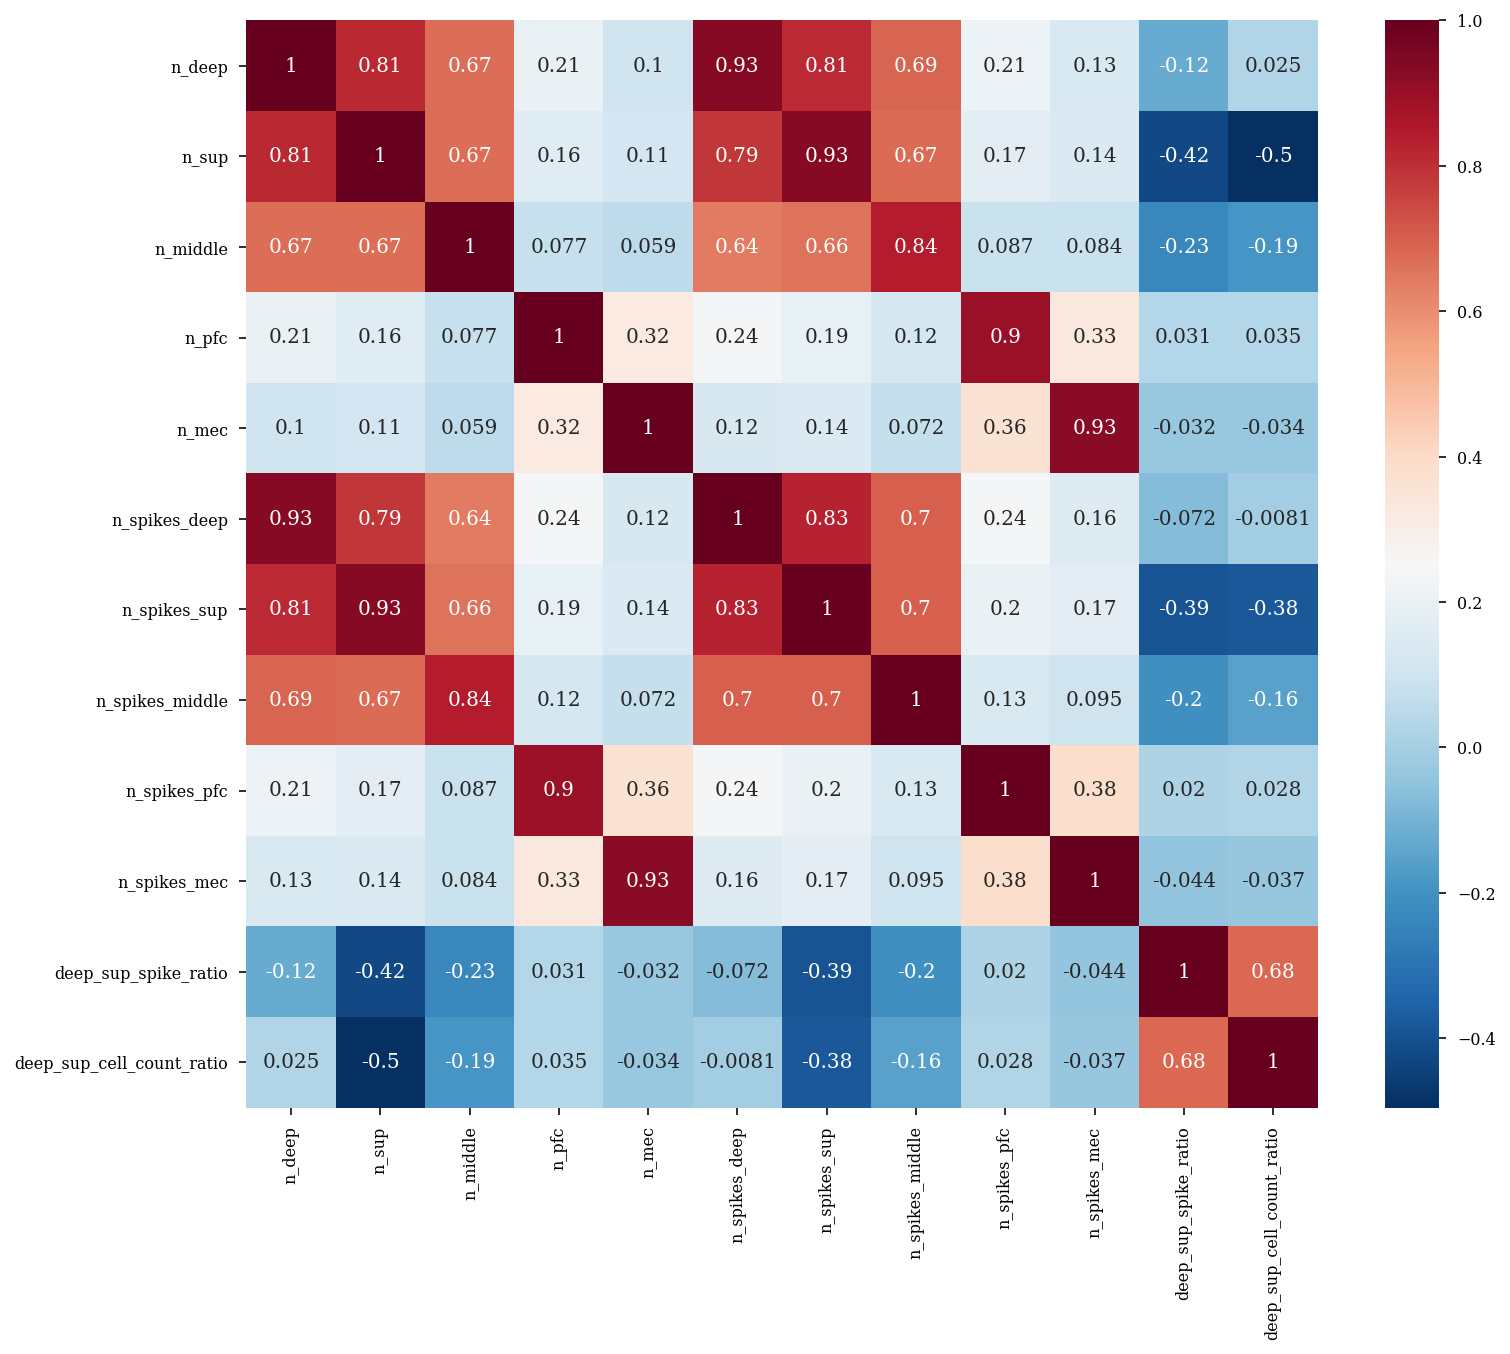

In [86]:
plt.figure(figsize=(12, 10))
sns.heatmap(results.corr(), annot=True, cmap="RdBu_r")


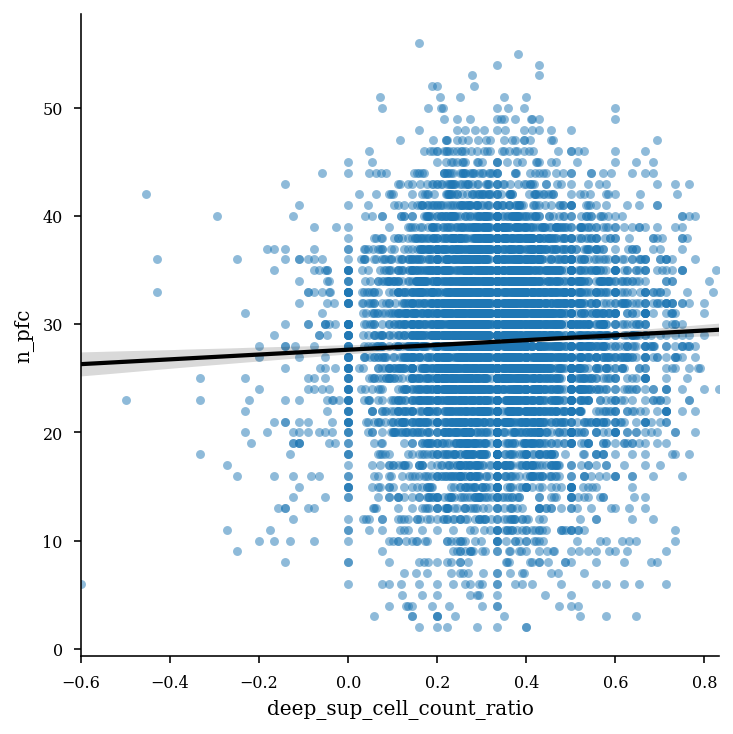

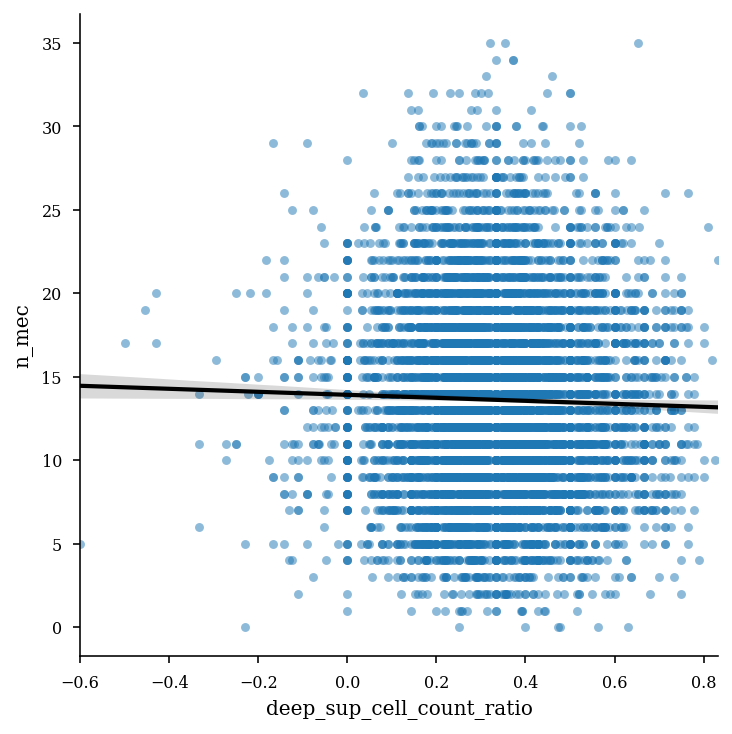

In [80]:
sns.lmplot(
    data=results.query("n_deep>1 & n_sup>1 & n_pfc>1"),
    x="deep_sup_cell_count_ratio",
    y="n_pfc",
    scatter_kws={"alpha": 0.5, "s": 20},
    line_kws={"color": "k"},
)
plt.show()
sns.lmplot(
    data=results.query("n_deep>1 & n_sup>1 & n_pfc>1"),
    x="deep_sup_cell_count_ratio",
    y="n_mec",
    scatter_kws={"alpha": 0.5, "s": 20},
    line_kws={"color": "k"},
)


<AxesSubplot:xlabel='n_deep', ylabel='n_spikes_pfc'>

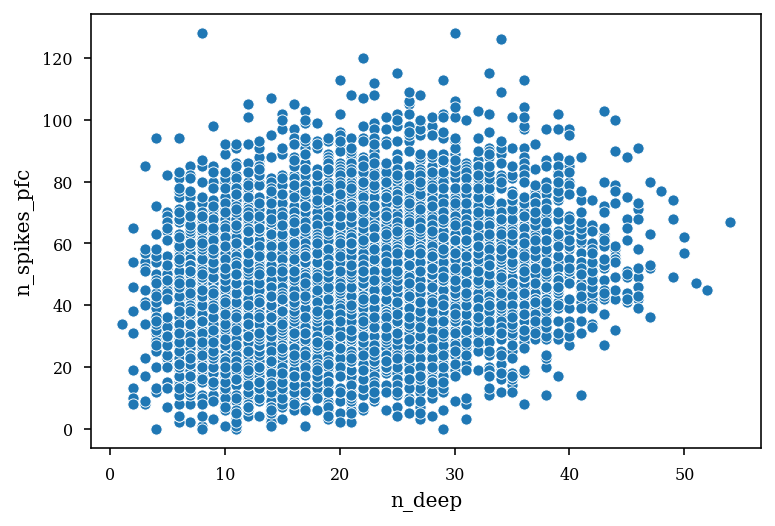

In [58]:
sns.scatterplot(data=results, x="n_deep", y="n_spikes_pfc")


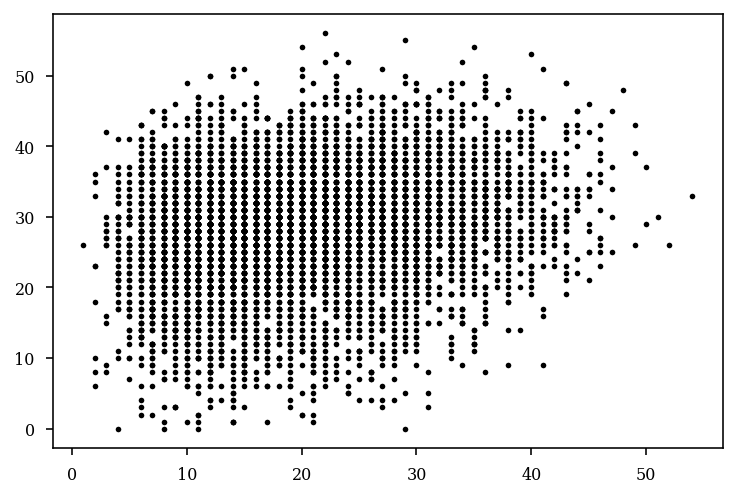

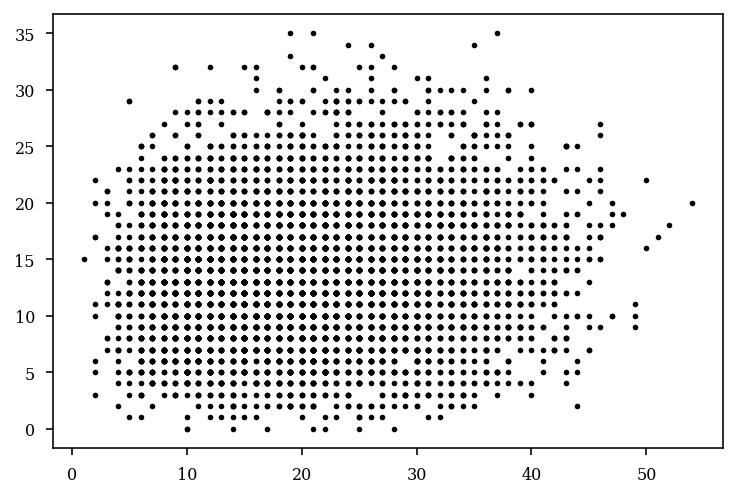

In [43]:
plt.plot(n_deep, n_pfc, ".k")
plt.show()
plt.plot(n_deep, n_mec, ".k")


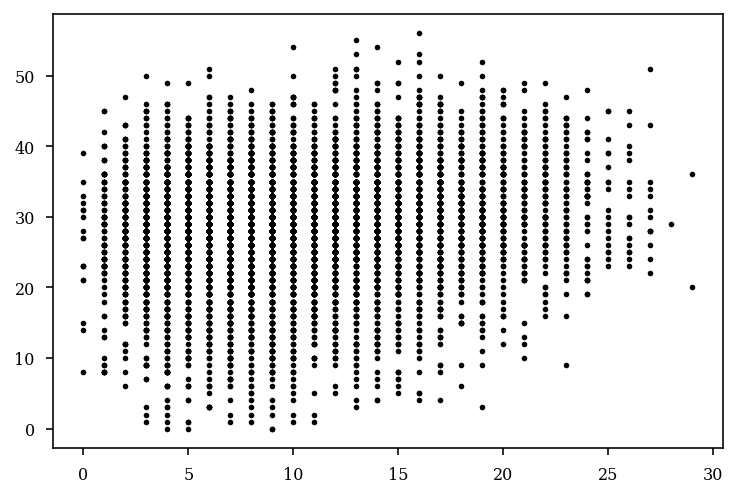

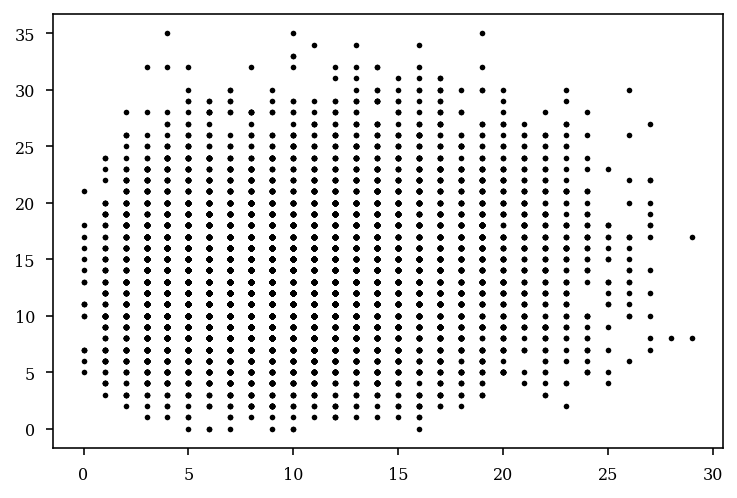

In [44]:
plt.plot(n_sup, n_pfc, ".k")
plt.show()
plt.plot(n_sup, n_mec, ".k")


In [31]:
cm.brainRegion[rip_par_mat[:, 0] > 0].value_counts().reset_index().rename(
    columns={"brainRegion": "count", "index": "brainRegion"}
)


brainRegion  count
0         PFC     35
1         CA1     28
2         MEC     14